# Project: Term Deposit Subscription Prediction
## Alfredo Coviello
## UT Austin AI/ML Course

In [283]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import random


## Deliverable – 1 (Exploratory data quality report reflecting the following

Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)

a. Univariate analysis – data types and description of the independent attributes
 which should include (name, meaning, range of values observed, central values
 (mean and median), standard deviation and quartiles, analysis of the body of
 distributions / tails, missing values, outliers.
 
b. Strategies to address the different data challenges such as data pollution, outlier’s
 treatment and missing values treatment.
 
c. Please provide comments in jupyter notebook regarding the steps you take and
 insights drawn from the plots.

In [284]:
bank_data = pd.read_csv("bank-full.csv")
#bank_data.head()

In [285]:
bank_data.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [286]:
bank_data.tail(10)

age           job   marital  education default  balance housing loan  \
45201   53    management   married   tertiary      no      583      no   no   
45202   34        admin.    single  secondary      no      557      no   no   
45203   23       student    single   tertiary      no      113      no   no   
45204   73       retired   married  secondary      no     2850      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45201   cellular   17   nov       226         1    184         4  success   
45202   cellular   17   nov       224         1     -1         0  unknown   
45203   cellular   17   nov       266         1     -1         0  unknown   
45204   cellular   17   nov       300         1     40         8  failure   
45205   cellular   17   nov       386         2     -1         0  unknown   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45201    yes  
45202    yes  
45203    yes  
45204    yes  
45205    yes  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

In [287]:
bank_data.shape
# 45211 records, 1 target variable, 16 independent variables

(45211, 17)

In [288]:
bank_data.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [449]:
bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

## Comments on data:
#### age: slightly skewed to the right, with one high max value
#### balance: skewed to the left, with a high min value, and a huge high max value
#### day: seems evenly distributed
#### duration: skewed to the right, high variance, with a very high max value
#### campaign: skewed to the right with a high max value, high variance
#### pdays: high variance, dominated by -1
#### previous: high variance, dominated by 0, high max value

In [289]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [290]:
print(bank_data.isna().count()) # no nulls
round(bank_data.isna().sum()*100/bank_data.shape[0],2) #check for % null values


age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
Target       0.0
dtype: float64

# Target

In [291]:
bank_data.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

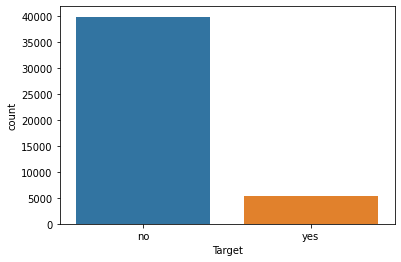

In [292]:
sns.countplot(bank_data.Target) 
# >10% are Yes, rest are No - imbalanced dataset

In [359]:
pd.crosstab(index=[bank_data.Target], columns='count', normalize=True)

col_0      count
Target          
no      0.883015
yes     0.116985

# Age

In [293]:
bank_data.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [424]:
bank_data.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

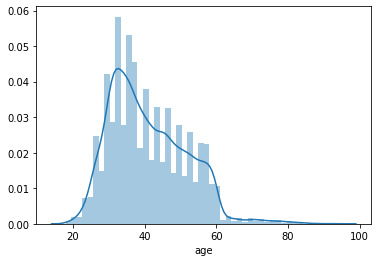

In [295]:
sns.distplot(bank_data.age);

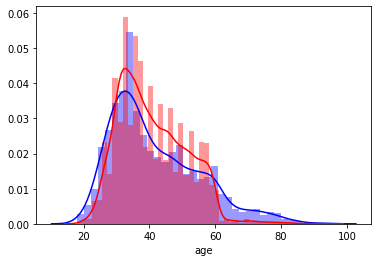

In [296]:
sns.distplot(bank_data[bank_data.Target=='yes'].age, color='b');
sns.distplot(bank_data[bank_data.Target=='no'].age, color='r');

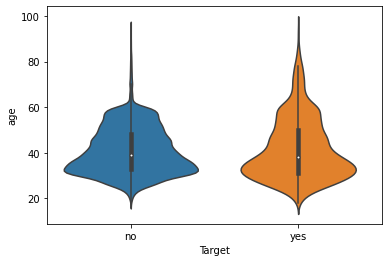

In [297]:
sns.violinplot('Target', 'age', data = bank_data)
# People who have Term Deposits tend to be slightly older then those who haven't,
# but no clear discrimination apparently

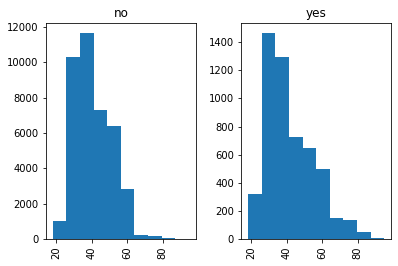

In [298]:
bank_data.age.hist(by=bank_data.Target);

# Job

In [299]:
bank_data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [375]:
bank_data.job.value_counts(normalize=True)
# Large number of blue-collar >20%, few "unknowns" <1%

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [527]:
n=0
for v in bank_data.job.unique():
    print(f"'{v}':{n}, ")
    n=n+1

'management':0, 
'technician':1, 
'entrepreneur':2, 
'blue-collar':3, 
'unknown':4, 
'retired':5, 
'admin.':6, 
'services':7, 
'self-employed':8, 
'unemployed':9, 
'housemaid':10, 
'student':11, 


In [529]:
job_map = {'management':0, 
    'technician':1, 
    'entrepreneur':2, 
    'blue-collar':3, 
    'unknown':4, 
    'retired':5, 
    'admin.':6, 
    'services':7, 
    'self-employed':8, 
    'unemployed':9, 
    'housemaid':10, 
    'student':11}

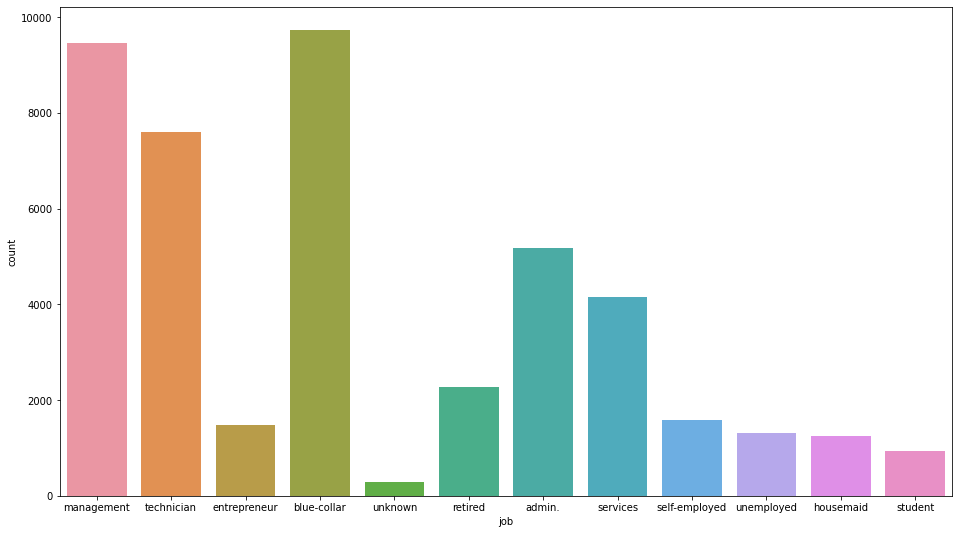

In [301]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(bank_data.job, orient="vertical");

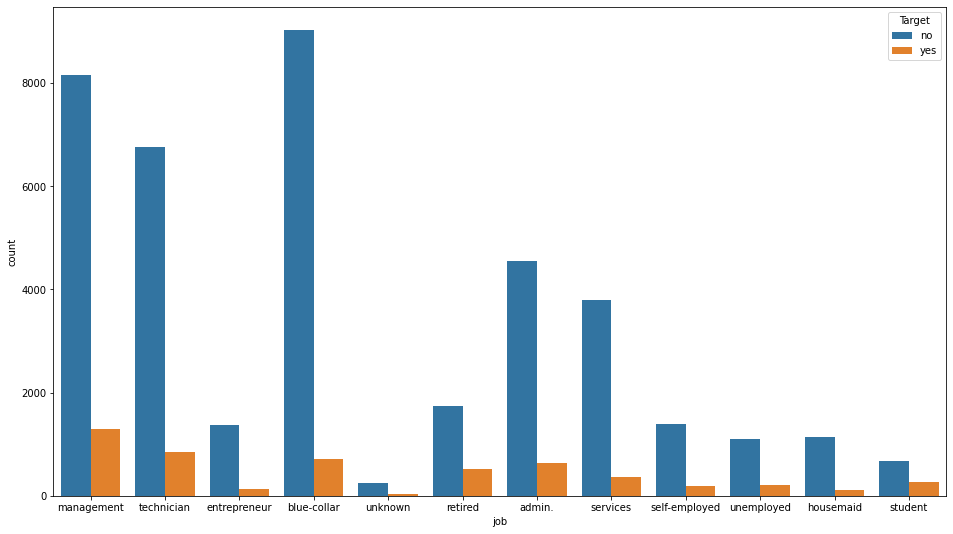

In [302]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(bank_data.job, orient="vertical", hue=bank_data.Target);
# Management seems to be group with more Term deposits, followed by technicians and blue-collar

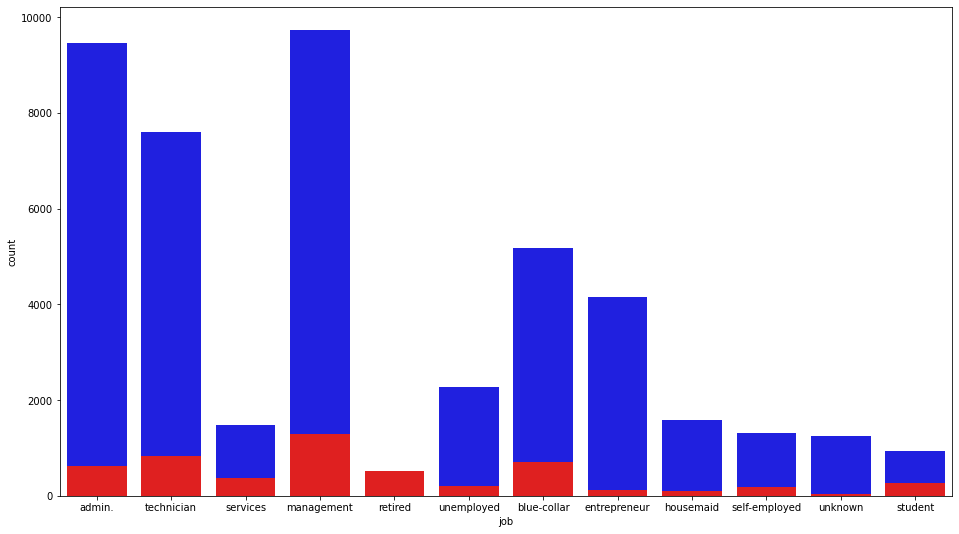

In [376]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(bank_data.job, orient="vertical", color='b');
sns.countplot(bank_data.job[bank_data.Target=='yes'], orient="vertical", color='r');


In [432]:
pd.crosstab(index=[bank_data.Target, bank_data.job], columns='count', normalize=True).sort_values(by=['Target','count'],ascending=False)

col_0                    count
Target job                    
yes    management     0.028776
       technician     0.018580
       blue-collar    0.015660
       admin.         0.013957
       retired        0.011413
       services       0.008162
       student        0.005950
       unemployed     0.004468
       self-employed  0.004136
       entrepreneur   0.002721
       housemaid      0.002411
       unknown        0.000752
no     blue-collar    0.199597
       management     0.180421
       technician     0.149455
       admin.         0.100418
       services       0.083719
       retired        0.038663
       self-employed  0.030789
       entrepreneur   0.030170
       housemaid      0.025016
       unemployed     0.024352
       student        0.014797
       unknown        0.005618

# Marital

In [303]:
bank_data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [457]:
bank_data.marital.value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [531]:
marital_map = { 'married':0, 'single': 1, 'divorced': 2}

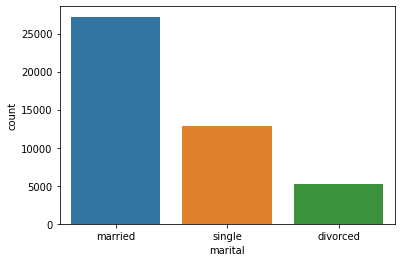

In [305]:
sns.countplot(bank_data.marital);

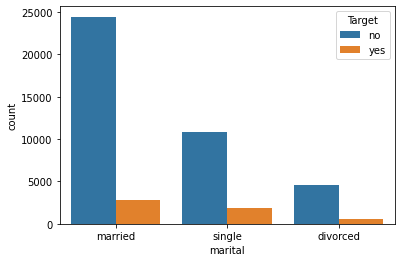

In [306]:
sns.countplot(bank_data.marital, hue=bank_data.Target );
# Married is the group with more Term desposits

In [357]:
pd.crosstab(index=[bank_data.Target, bank_data.marital], columns='count', normalize=True)


col_0               count
Target marital           
no     divorced  0.101413
       married   0.540997
       single    0.240605
yes    divorced  0.013758
       married   0.060936
       single    0.042291

# Education

In [307]:
bank_data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [532]:
education_map = {'tertiary':0, 'secondary':1, 'unknown':2, 'primary':3}

In [458]:
bank_data.education.value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

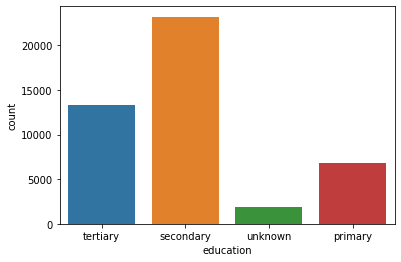

In [309]:
sns.countplot(bank_data.education);

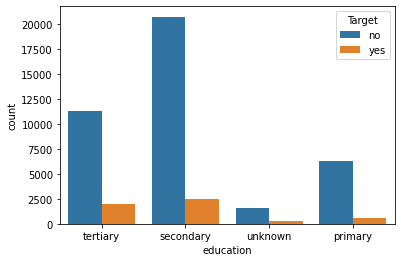

In [310]:
sns.countplot(bank_data.education, hue=bank_data.Target );


In [433]:
pd.crosstab(index=[bank_data.Target, bank_data.education], columns='count', normalize=True).sort_values(by=['Target','count'],ascending=False)

col_0                count
Target education          
yes    secondary  0.054190
       tertiary   0.044149
       primary    0.013072
       unknown    0.005574
no     secondary  0.459003
       tertiary   0.250050
       primary    0.138462
       unknown    0.035500

In [ ]:
# Education secondary has the highest # of Term Deposit as well as non Term Deposit

# Default

In [311]:
bank_data.default.unique()

array(['no', 'yes'], dtype=object)

In [459]:
bank_data.default.value_counts(normalize=True)
# 98% on "no", likely won't help much

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [533]:
default_map = {'no':0, 'yes': 1}

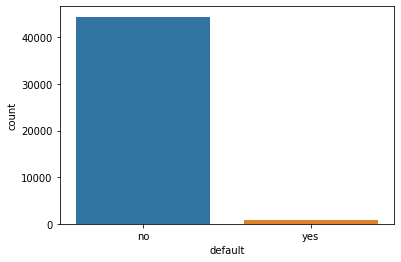

In [313]:
sns.countplot(bank_data.default);

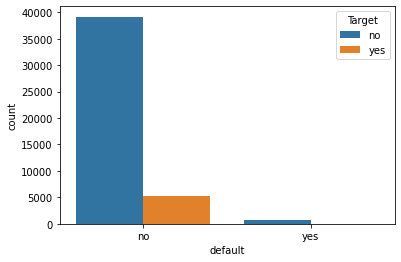

In [314]:
sns.countplot(bank_data.default, hue=bank_data.Target);

In [441]:
pd.crosstab(index=[bank_data.Target, bank_data.default], columns='count')

col_0           count
Target default       
no     no       39159
       yes        763
yes    no        5237
       yes         52

In [ ]:
# Most customers with a Term Deposit do not have a Default.

# Housing

In [315]:
bank_data.housing.unique()

array(['yes', 'no'], dtype=object)

In [460]:
bank_data.housing.value_counts(normalize=True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [534]:
housing_map = {'no':0, 'yes':1}

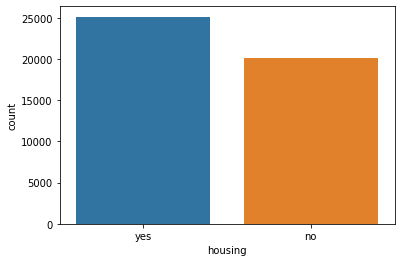

In [317]:
sns.countplot(bank_data.housing);

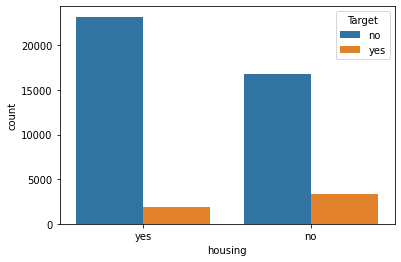

In [318]:
sns.countplot(bank_data.housing, hue=bank_data.Target);

In [354]:
pd.crosstab(index=[bank_data.Target, bank_data.housing], columns='count', normalize=True)

col_0              count
Target housing          
no     no       0.369976
       yes      0.513039
yes    no       0.074185
       yes      0.042799

In [ ]:
# Most customers with a Deposit do not have a House loan

# Loan

In [319]:
bank_data.loan.unique()

array(['no', 'yes'], dtype=object)

In [461]:
bank_data.loan.value_counts(normalize=True)
# 84% on "no", likely won't help much?

no     0.839774
yes    0.160226
Name: loan, dtype: float64

In [535]:
loan_map = { 'no':0, 'yes': 1}

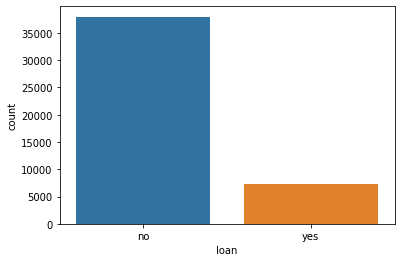

In [321]:
sns.countplot(bank_data.loan);

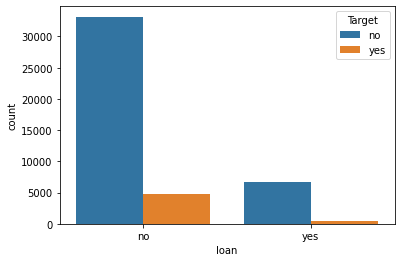

In [322]:
    sns.countplot(bank_data.loan, hue=bank_data.Target);

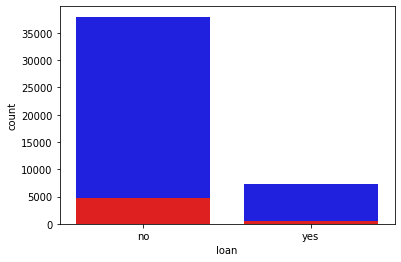

In [334]:
sns.countplot(bank_data.loan, color='b'); # Blue total
sns.countplot(bank_data.loan[bank_data.Target=='yes'], color='r'); # Red, the ones with Term Deposit

In [353]:
pd.crosstab(index=[bank_data.Target, bank_data.loan], columns='count', normalize=True)

col_0           count
Target loan          
no     no    0.733494
       yes   0.149521
yes    no    0.106279
       yes   0.010705

In [ ]:
# Most customers with a Term Deposit do not have a personal loan

# Balance

In [323]:
bank_data.balance.unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [462]:
bank_data.balance.value_counts(normalize=True)

0        0.077724
1        0.004313
2        0.003450
4        0.003074
3        0.002964
           ...   
4305     0.000022
6352     0.000022
18881    0.000022
14889    0.000022
7218     0.000022
Name: balance, Length: 7168, dtype: float64

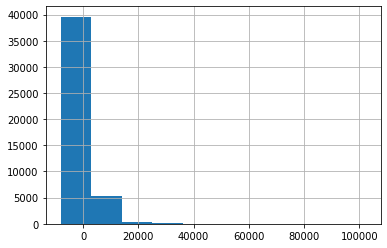

In [325]:
bank_data.balance.hist();

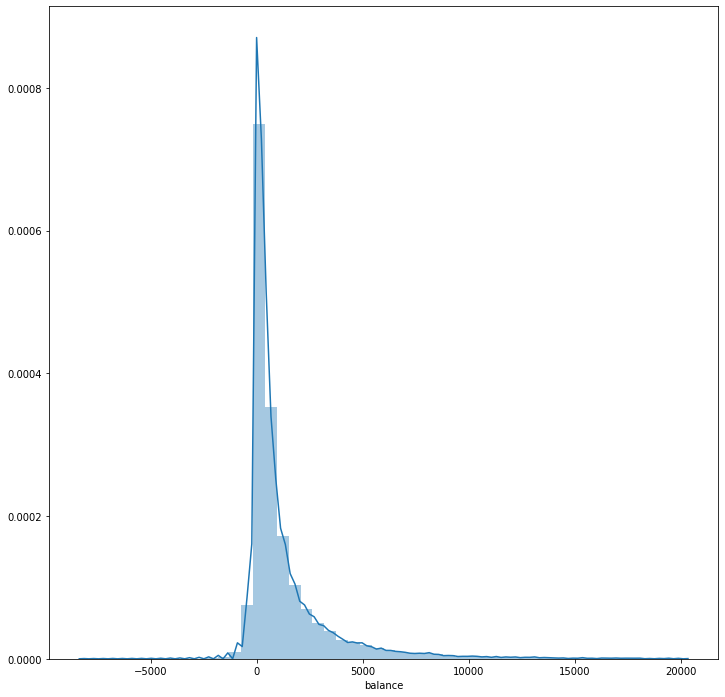

In [402]:
plt.figure(figsize=(12,12))

sns.distplot(bank_data[bank_data.balance<=20000].backfilllance);

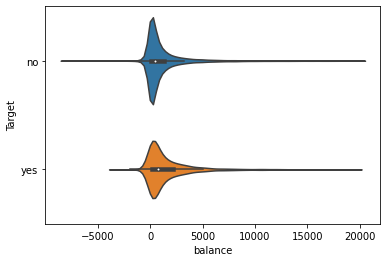

In [409]:
sns.violinplot('balance', 'Target',  data = bank_data[bank_data.balance<=20000]);

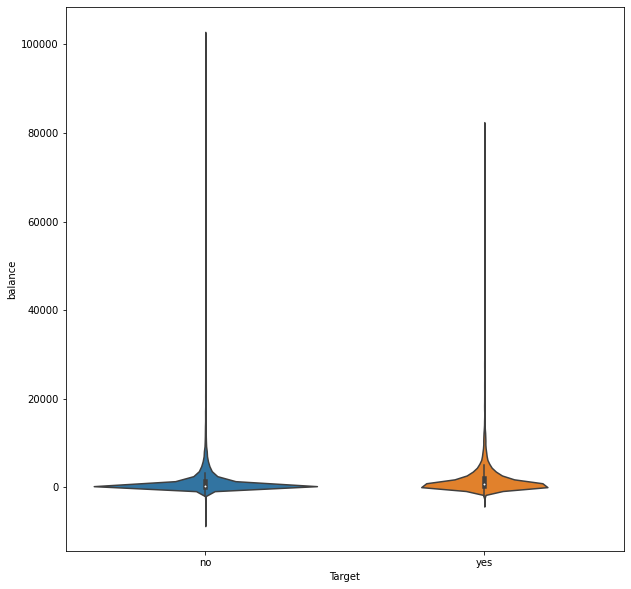

In [413]:
plt.figure(figsize=(10,10))
sns.violinplot('Target', 'balance', data = bank_data);
# bank_data.balance<=20000

In [ ]:
# No much to tell here. Most customers have a balance < 1000, and there are a lot of extreme outliers.

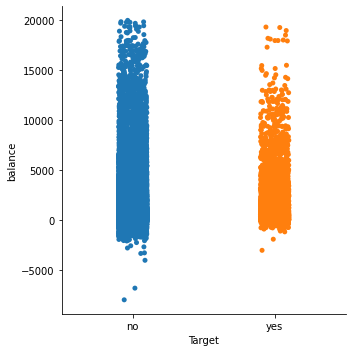

In [401]:
sns.catplot(data=bank_data[bank_data.balance<=20000], x='Target', y='balance');

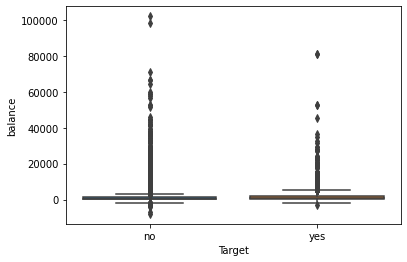

In [332]:
sns.boxplot(data=bank_data, x='Target', y='balance');

In [ ]:
# sns.catplot(data=bank_data, x='Target', y='balance', kind='swarm');
# This one doesn't render, never ends...


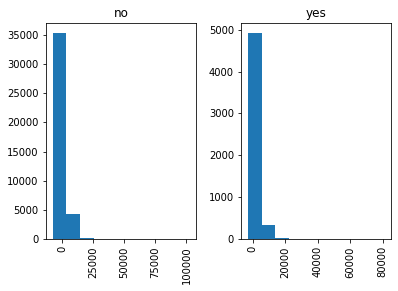

In [329]:
bank_data.balance.hist(by=bank_data.Target);

# Contact

In [121]:
bank_data.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [463]:
bank_data.contact.value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [536]:
contact_map = {'unknown':0, 'cellular':1, 'telephone':2}

In [125]:
bank_data.contact.value_counts() #.plot(kind='bar')

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

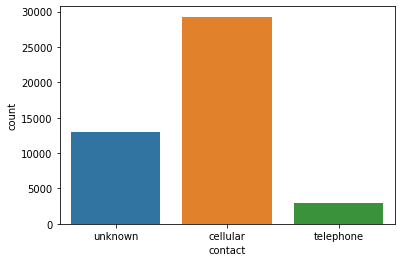

In [127]:
sns.countplot(bank_data.contact);

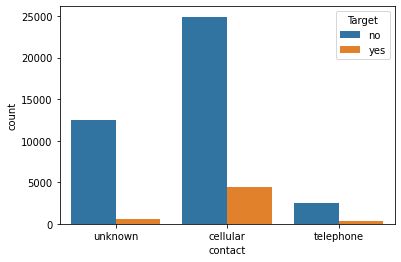

In [128]:
sns.countplot(bank_data.contact, hue=bank_data.Target);

In [443]:
pd.crosstab(index=[bank_data.Target, bank_data.contact], columns='count', normalize=True).sort_values(by=['Target', 'count'], ascending=False)

col_0                count
Target contact            
yes    cellular   0.096636
       unknown    0.011723
       telephone  0.008626
no     cellular   0.551105
       unknown    0.276260
       telephone  0.055650

In [ ]:
# Contacts by cellular have the highest of customers with Term Deposit

# Month

In [130]:
bank_data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [464]:
bank_data.month.value_counts(normalize=True)

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

In [537]:
month_map = {'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11}

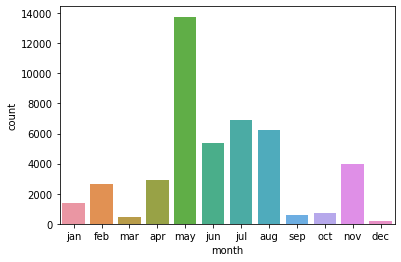

In [350]:
sns.countplot(bank_data.month, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] );

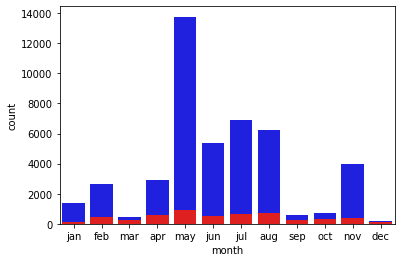

In [349]:
sns.countplot(bank_data.month, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
              color='b');
sns.countplot(bank_data[bank_data.Target=='yes'].month, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
              color='r'); 
#hue=bank_data.Target,

In [348]:
pd.crosstab(index=[bank_data.Target, bank_data.month], columns='count', normalize=True)
# Last contact in May has the highest number of customers, and the highest number of customers with Term Deposit
# December, the least

col_0            count
Target month          
no     apr    0.052089
       aug    0.122957
       dec    0.002522
       feb    0.048838
       jan    0.027891
       jul    0.138639
       jun    0.106058
       mar    0.005065
       may    0.284024
       nov    0.078897
       oct    0.009179
       sep    0.006857
yes    apr    0.012762
       aug    0.015218
       dec    0.002212
       feb    0.009754
       jan    0.003141
       jul    0.013868
       jun    0.012077
       mar    0.005485
       may    0.020460
       nov    0.008914
       oct    0.007144
       sep    0.005950

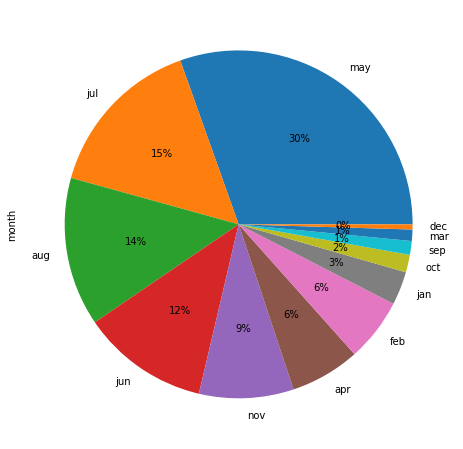

In [194]:
plt.figure(figsize=(8,8))
bank_data.month.value_counts().plot(kind='pie',autopct='%1.0f%%'); # Pie chart representation of different Races of people.

# Day

In [136]:
bank_data.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [465]:
bank_data.day.value_counts(normalize=True)

20    0.060870
18    0.051050
21    0.044812
17    0.042888
6     0.042733
5     0.042246
14    0.040875
8     0.040742
28    0.040477
7     0.040189
19    0.038862
29    0.038597
15    0.037668
12    0.035456
13    0.035058
30    0.034638
9     0.034527
11    0.032713
4     0.031961
16    0.031298
2     0.028599
27    0.024795
3     0.023866
26    0.022893
23    0.020769
22    0.020017
25    0.018580
31    0.014222
10    0.011590
24    0.009887
1     0.007122
Name: day, dtype: float64

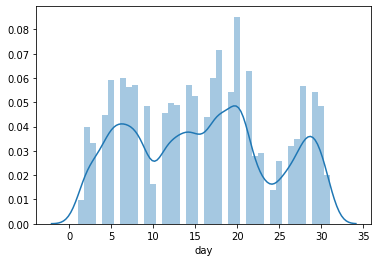

In [154]:
sns.distplot(bank_data.day);


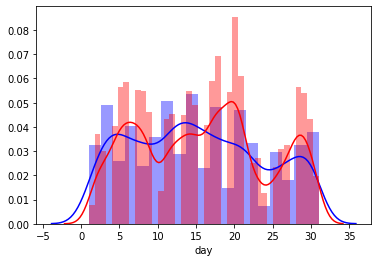

In [155]:
sns.distplot(bank_data.day[bank_data.Target=='yes'], color='b');
sns.distplot(bank_data.day[bank_data.Target=='no'], color='r');

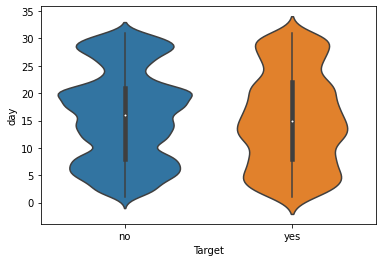

In [224]:
sns.violinplot('Target', 'day', data=bank_data);
# There seems to be 3 similar modes for both Yes and No Term Deposit customers:
# around day 5-7, around day 15-20 and around day 25-30

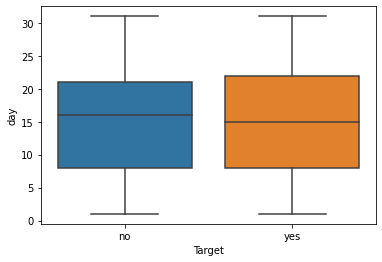

In [225]:
sns.boxplot('Target', 'day', data=bank_data);

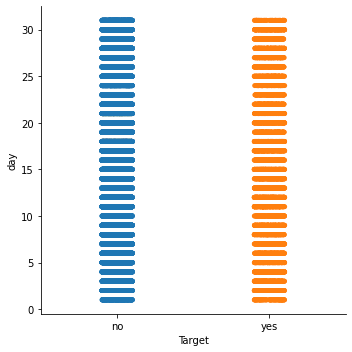

In [274]:
sns.catplot(data=bank_data, x='Target', y='day');

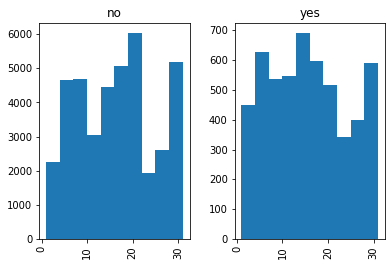

In [143]:
bank_data.day.hist(by=bank_data.Target);

# Duration

In [156]:
bank_data.duration.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [466]:
bank_data.duration.value_counts(normalize=True)

124     0.004158
90      0.004070
89      0.003915
122     0.003871
104     0.003871
          ...   
2150    0.000022
1970    0.000022
1906    0.000022
1842    0.000022
2015    0.000022
Name: duration, Length: 1573, dtype: float64

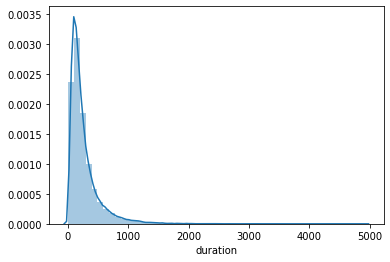

In [158]:
sns.distplot(bank_data.duration)

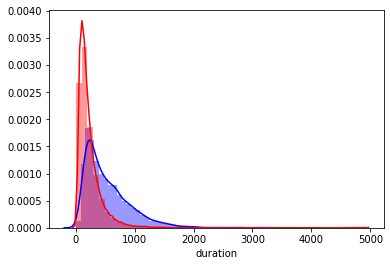

In [159]:
sns.distplot(bank_data[bank_data.Target=='yes'].duration, color='b' );
sns.distplot(bank_data[bank_data.Target=='no'].duration, color='r' );

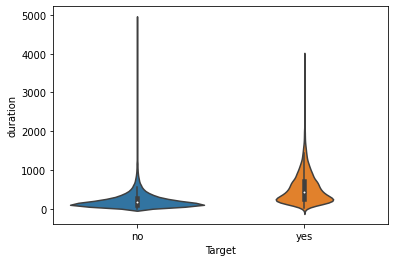

In [221]:
sns.violinplot('Target', 'duration', data=bank_data);

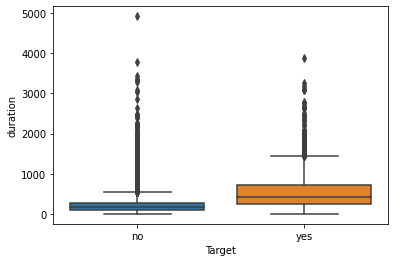

In [223]:
sns.boxplot('Target', 'duration', data=bank_data);
# Duration of contact is longer for customers with Term Deposit than those with none,
# which could make sense since the contact may have involved actually contracting the Term Deposit?

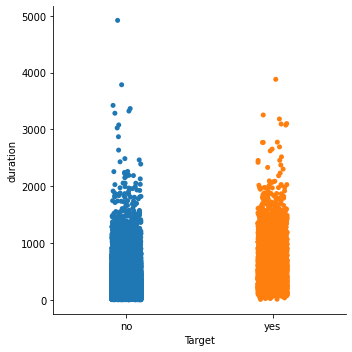

In [273]:
sns.catplot(data=bank_data, x='Target', y='duration');

In [340]:
#sns.swarmplot(data=bank_data, x='Target', y='duration');

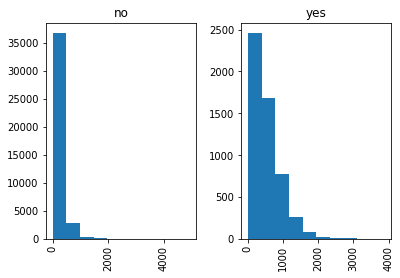

In [164]:
bank_data.duration.hist(by=bank_data.Target);

# Campaign

In [160]:
bank_data.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [467]:
bank_data.campaign.value_counts(normalize=True)

1     0.388047
2     0.276592
3     0.122116
4     0.077901
5     0.039017
6     0.028555
7     0.016257
8     0.011944
9     0.007233
10    0.005884
11    0.004446
12    0.003428
13    0.002942
14    0.002057
15    0.001858
16    0.001747
17    0.001526
18    0.001128
19    0.000973
20    0.000951
21    0.000774
22    0.000509
23    0.000487
25    0.000487
24    0.000442
28    0.000354
29    0.000354
26    0.000288
31    0.000265
27    0.000221
32    0.000199
30    0.000177
33    0.000133
34    0.000111
36    0.000088
35    0.000088
43    0.000066
38    0.000066
41    0.000044
50    0.000044
37    0.000044
51    0.000022
55    0.000022
46    0.000022
58    0.000022
44    0.000022
39    0.000022
63    0.000022
Name: campaign, dtype: float64

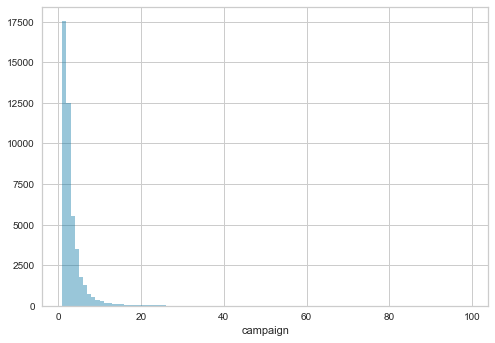

In [639]:
sns.distplot(bank_data.campaign, kde=False, bins=np.arange(1,100) );

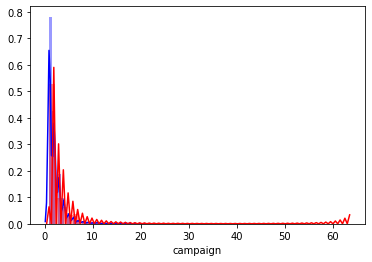

In [165]:
sns.distplot(bank_data[bank_data.Target=='yes'].campaign, color='b');
sns.distplot(bank_data[bank_data.Target=='no'].campaign, color='r');

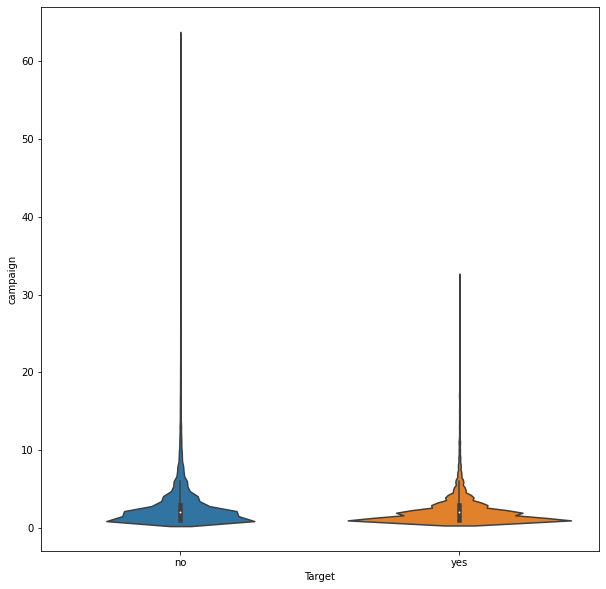

In [414]:
plt.figure(figsize=(10,10))
sns.violinplot('Target', 'campaign', data=bank_data);

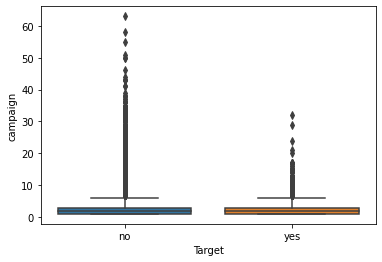

In [218]:
sns.boxplot('Target', 'campaign', data=bank_data);

In [386]:
pd.crosstab(index=[bank_data.Target, bank_data.campaign], columns='count', normalize=True).head(50)

col_0               count
Target campaign          
no     1         0.331402
       2         0.245604
       3         0.108447
       4         0.070890
       5         0.035943
       6         0.026520
       7         0.015218
       8         0.011236
       9         0.006768
       10        0.005574
       11        0.004092
       12        0.003340
       13        0.002809
       14        0.001969
       15        0.001769
       16        0.001703
       17        0.001393
       18        0.001128
       19        0.000973
       20        0.000929
       21        0.000752
       22        0.000509
       23        0.000487
       24        0.000420
       25        0.000487
       26        0.000288
       27        0.000221
       28        0.000354
       29        0.000332
       30        0.000177
       31        0.000265
       32        0.000177
       33        0.000133
       34        0.000111
       35        0.000088
       36        0.000088
       37        0.000044
       38        0.000066
       39        0.000022
       41        0.000044
       43        0.000066
       44        0.000022
       46        0.000022
       50        0.000044
       51        0.000022
       55        0.000022
       58        0.000022
       63        0.000022
yes    1         0.056646
       2         0.030988

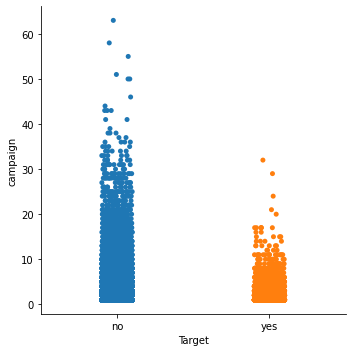

In [276]:
sns.catplot(data=bank_data, x='Target', y='campaign');
# Campaign contacts tend to be more frequent for clients without Term Deposit, which may be explained
# by the attempts to get them to contract one.

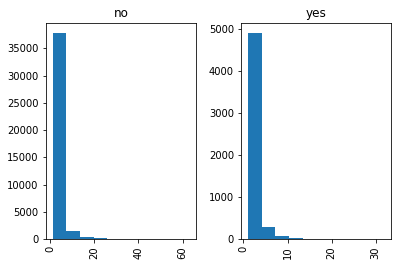

In [168]:
bank_data.campaign.hist(by=bank_data.Target);

# Pdays

In [169]:
bank_data.pdays.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [469]:
bank_data.pdays.value_counts(normalize=True)
# 82% on "-1", likely won't help too much

-1      0.817367
 182    0.003694
 92     0.003251
 183    0.002787
 91     0.002787
          ...   
 749    0.000022
 717    0.000022
 589    0.000022
 493    0.000022
 32     0.000022
Name: pdays, Length: 559, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


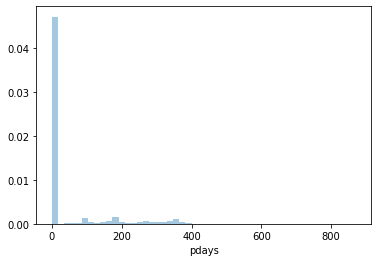

In [172]:
sns.distplot(bank_data.pdays);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


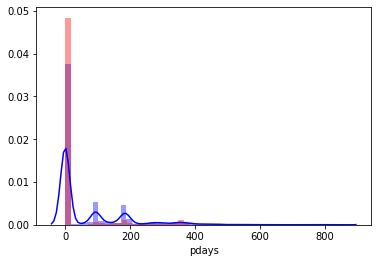

In [173]:
sns.distplot(bank_data[bank_data.Target=='yes'].pdays, color='b');
sns.distplot(bank_data[bank_data.Target=='no'].pdays, color='r');

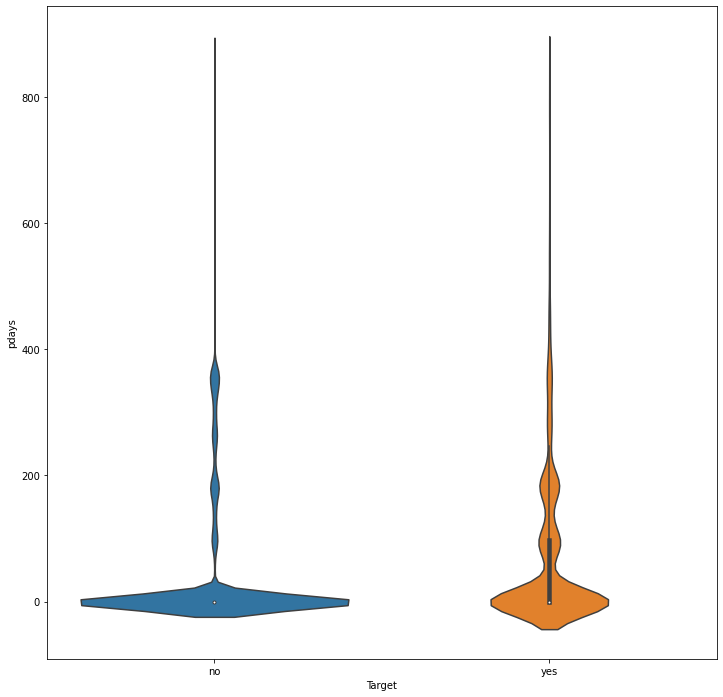

In [383]:
plt.figure(figsize=(12,12))
sns.violinplot('Target', 'pdays', data=bank_data);

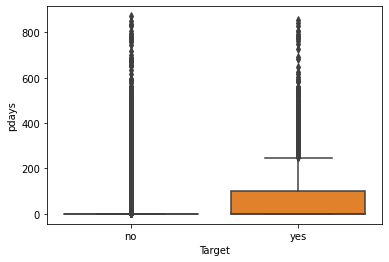

In [228]:
sns.boxplot('Target', 'pdays', data=bank_data);

In [392]:
# Clients without a Term Deposit overwhelmingly (74%) have not been previously contacted or
# not contacted within the past 900 days.
print(bank_data[bank_data.Target=='yes'].describe().T)
print(bank_data[bank_data.Target=='no'].describe().T)

           count         mean          std     min    25%    50%     75%  \
age       5289.0    41.670070    13.497781    18.0   31.0   38.0    50.0   
balance   5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0  2159.0   
day       5289.0    15.158253     8.501875     1.0    8.0   15.0    22.0   
duration  5289.0   537.294574   392.525262     8.0  244.0  426.0   725.0   
campaign  5289.0     2.141047     1.921826     1.0    1.0    2.0     3.0   
pdays     5289.0    68.702968   118.822266    -1.0   -1.0   -1.0    98.0   
previous  5289.0     1.170354     2.553272     0.0    0.0    0.0     1.0   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     32.0  
pdays       854.0  
previous     58.0  
            count         mean          std     min   25%    50%     75%  \
age       39922.0    40.838986    10.172662    18.0  33.0   39.0    48.0   
balance   39922.0  1303.714969  2974.195473 -8019.0  58.0  417.0  1345.0   
day

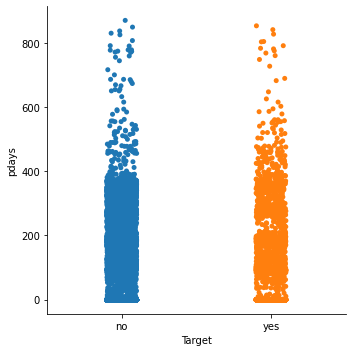

In [422]:
sns.catplot(data=bank_data, x='Target', y='pdays'); #kind='swarm'

In [393]:
pd.crosstab(index=[bank_data.Target, bank_data.pdays], columns='count', normalize=True)

col_0            count
Target pdays          
no     -1     0.742518
        1     0.000199
        2     0.000774
        3     0.000022
        4     0.000022
...                ...
yes     804   0.000022
        805   0.000022
        828   0.000022
        842   0.000022
        854   0.000022

[914 rows x 1 columns]

In [417]:
bd2 = bank_data[bank_data.pdays<50]
pd.crosstab(index=[bd2.Target, bd2.pdays], columns='count', normalize=True)

Target        no                                                              \
pdays        -1         1         2         3         4         5         6    
col_0                                                                          
count   0.902322  0.000242  0.000941  0.000027  0.000027  0.000296  0.000242   

Target                                ...       yes                      \
pdays         7         8         9   ...        35        36        37   
col_0                                 ...                                 
count   0.000188  0.000672  0.000242  ...  0.000081  0.000027  0.000027   

Target                                                                        
pdays         38        40        41        43        44        48        49  
col_0                                                                         
count   0.000054  0.000081  0.000054  0.000027  0.000027  0.000054  0.000027  

[1 rows x 76 columns]

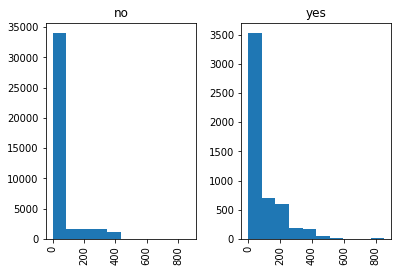

In [444]:
bank_data.pdays.hist(by=bank_data.Target);

# Previous

In [175]:
bank_data.previous.unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [364]:
bank_data.previous.value_counts(normalize=True)
# 81% of fall on "0", won't likely help much

0      0.817367
1      0.061313
2      0.046582
3      0.025259
4      0.015793
5      0.010152
6      0.006127
7      0.004534
8      0.002853
9      0.002035
10     0.001482
11     0.001438
12     0.000973
13     0.000841
15     0.000442
14     0.000420
17     0.000332
16     0.000288
19     0.000243
23     0.000177
20     0.000177
22     0.000133
18     0.000133
24     0.000111
27     0.000111
29     0.000088
25     0.000088
21     0.000088
30     0.000066
28     0.000044
26     0.000044
37     0.000044
38     0.000044
55     0.000022
40     0.000022
35     0.000022
58     0.000022
51     0.000022
41     0.000022
32     0.000022
275    0.000022
Name: previous, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


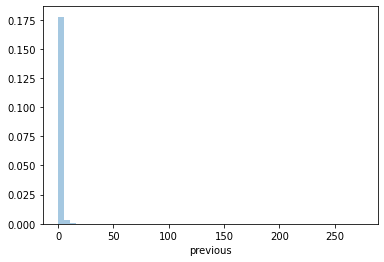

In [178]:
sns.distplot(bank_data.previous);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


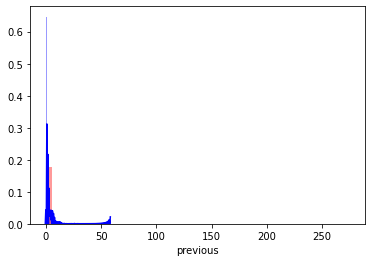

In [268]:
sns.distplot(bank_data[bank_data.Target=='yes'].previous, color='b');
sns.distplot(bank_data[bank_data.Target=='no'].previous, color='r');

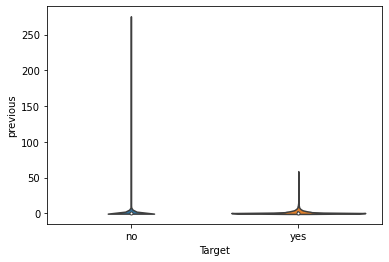

In [269]:
sns.violinplot('Target', 'previous', data=bank_data);

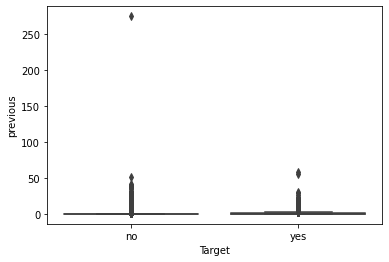

In [231]:
sns.boxplot('Target', 'previous', data=bank_data);

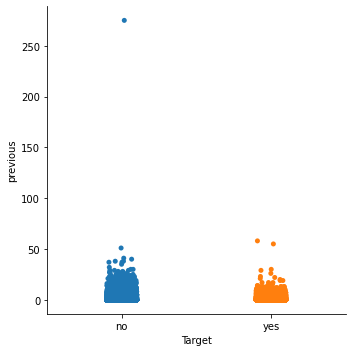

In [338]:
sns.catplot(data=bank_data, x='Target', y='previous'); # kind='swarm'

In [394]:
pd.crosstab(index=[bank_data.Target, bank_data.previous], columns='count', normalize=True)

col_0               count
Target previous          
no     0         0.742518
       1         0.048417
       2         0.036496
       3         0.018756
       4         0.012010
...                   ...
yes    26        0.000022
       29        0.000022
       30        0.000022
       55        0.000022
       58        0.000022

[66 rows x 1 columns]

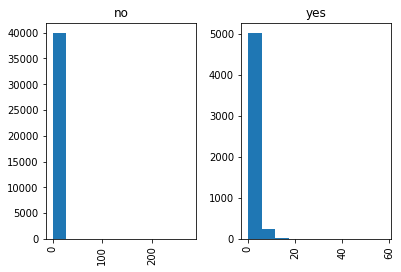

In [181]:
bank_data.previous.hist(by=bank_data.Target);

In [232]:
# Let's remove the one very high value, 275

bank_data[bank_data.previous==275]


age         job  marital education default  balance housing loan  \
29182   40  management  married  tertiary      no      543     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
29182  cellular    2   feb       349         2    262       275    other   

      Target  
29182     no

# Poutcome

In [183]:
bank_data.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [538]:
poutcome_map = {'unknown':0, 'failure':1, 'other':2, 'success':3}


In [470]:
bank_data.poutcome.value_counts(normalize=True)
# 81% on unkown, likely won't help too much?

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

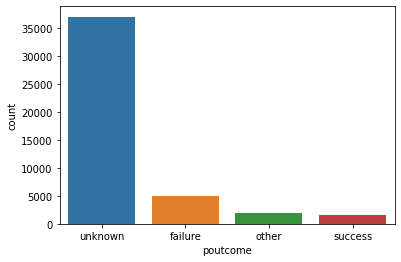

In [187]:
sns.countplot(bank_data.poutcome);

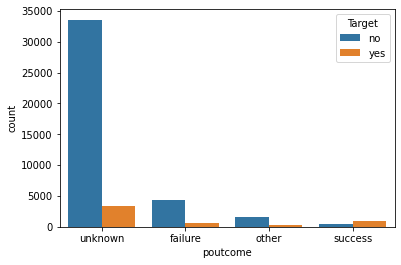

In [189]:
sns.countplot(bank_data.poutcome, hue=bank_data.Target );

In [346]:
pd.crosstab(index=[bank_data.Target, bank_data.poutcome], columns='count', normalize=True)
# Customers successfully contacted previously have a majority of Term Deposit contracts vs not.
# 74% 

col_0               count
Target poutcome          
no     failure   0.094734
       other     0.033908
       success   0.011789
       unknown   0.742585
yes    failure   0.013669
       other     0.006790
       success   0.021632
       unknown   0.074893

In [369]:
bank_data[bank_data.previous!=0]

age           job  marital  education default  balance housing loan  \
24060   33        admin.  married   tertiary      no      882      no   no   
24062   42        admin.   single  secondary      no     -247     yes  yes   
24064   33      services  married  secondary      no     3444     yes   no   
24072   36    management  married   tertiary      no     2415     yes   no   
24077   36    management  married   tertiary      no        0     yes   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45201   53    management  married   tertiary      no      583      no   no   
45204   73       retired  married  secondary      no     2850      no   no   
45208   72       retired  married  secondary      no     5715      no   no   
45210   37  entrepreneur  married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
24060  telephone   21   oct        39         1    151         3  failure   
24062  telephone   21   oct       519         1    166         1    other   
24064  telephone   21   oct       144         1     91         4  failure   
24072  telephone   22   oct        73         1     86         4    other   
24077  telephone   23   oct       140         1    143         3  failure   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45199   cellular   16   nov      1166         3    530        12    other   
45201   cellular   17   nov       226         1    184         4  success   
45204   cellular   17   nov       300         1     40         8  failure   
45208   cellular   17   nov      1127         5    184         3  success   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
24060     no  
24062    yes  
24064    yes  
24072     no  
24077    yes  
...      ...  
45199     no  
45201    yes  
45204    yes  
45208    yes  
45210     no  

[8257 rows x 17 columns]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


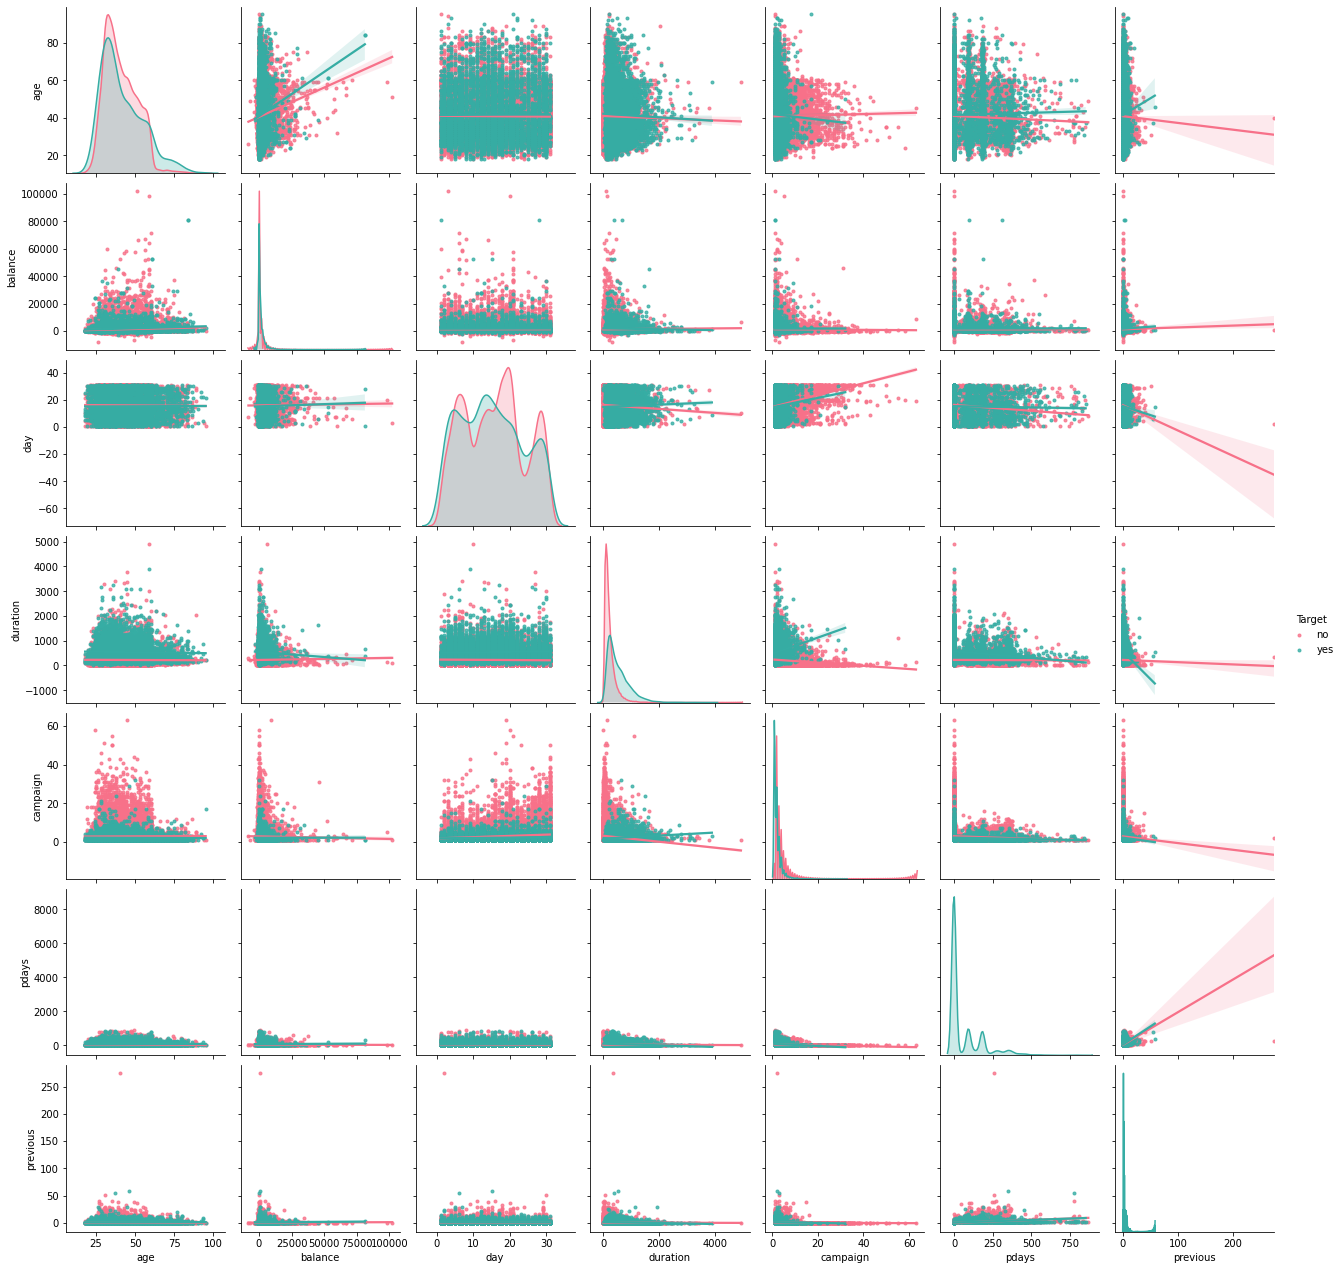

In [445]:
sns.pairplot(bank_data, hue="Target", palette='husl', markers='.', kind='reg'); #bank_data.previous!=275

In [ ]:
# Some correlation with Target: 
# age, day, duration: slightly

# Correlation amongst independent variables: not a lot really:
# Positive: age and balance, campaign and day, previous and pdays
# Negative: age and pdays, day and previous, campaign and previous

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


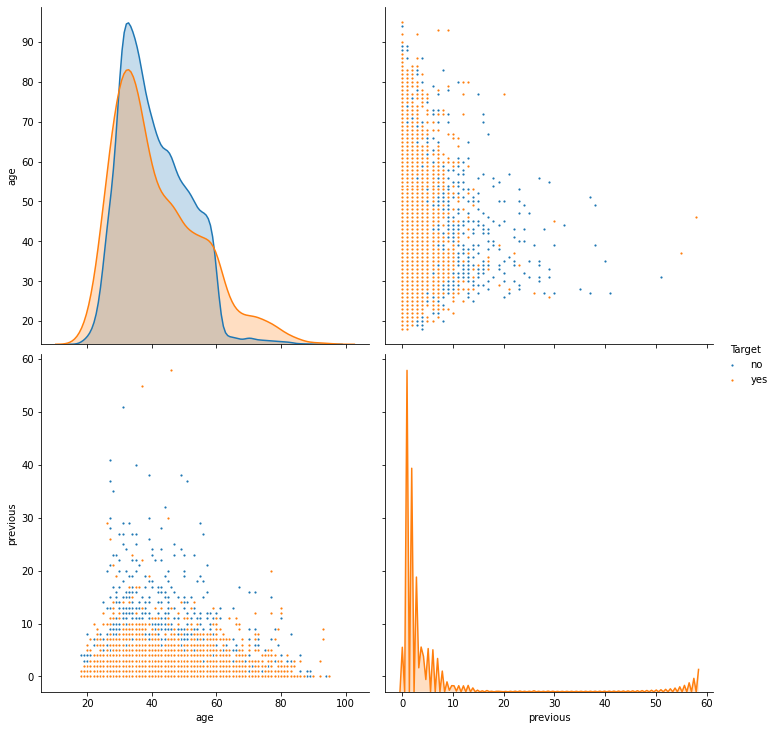

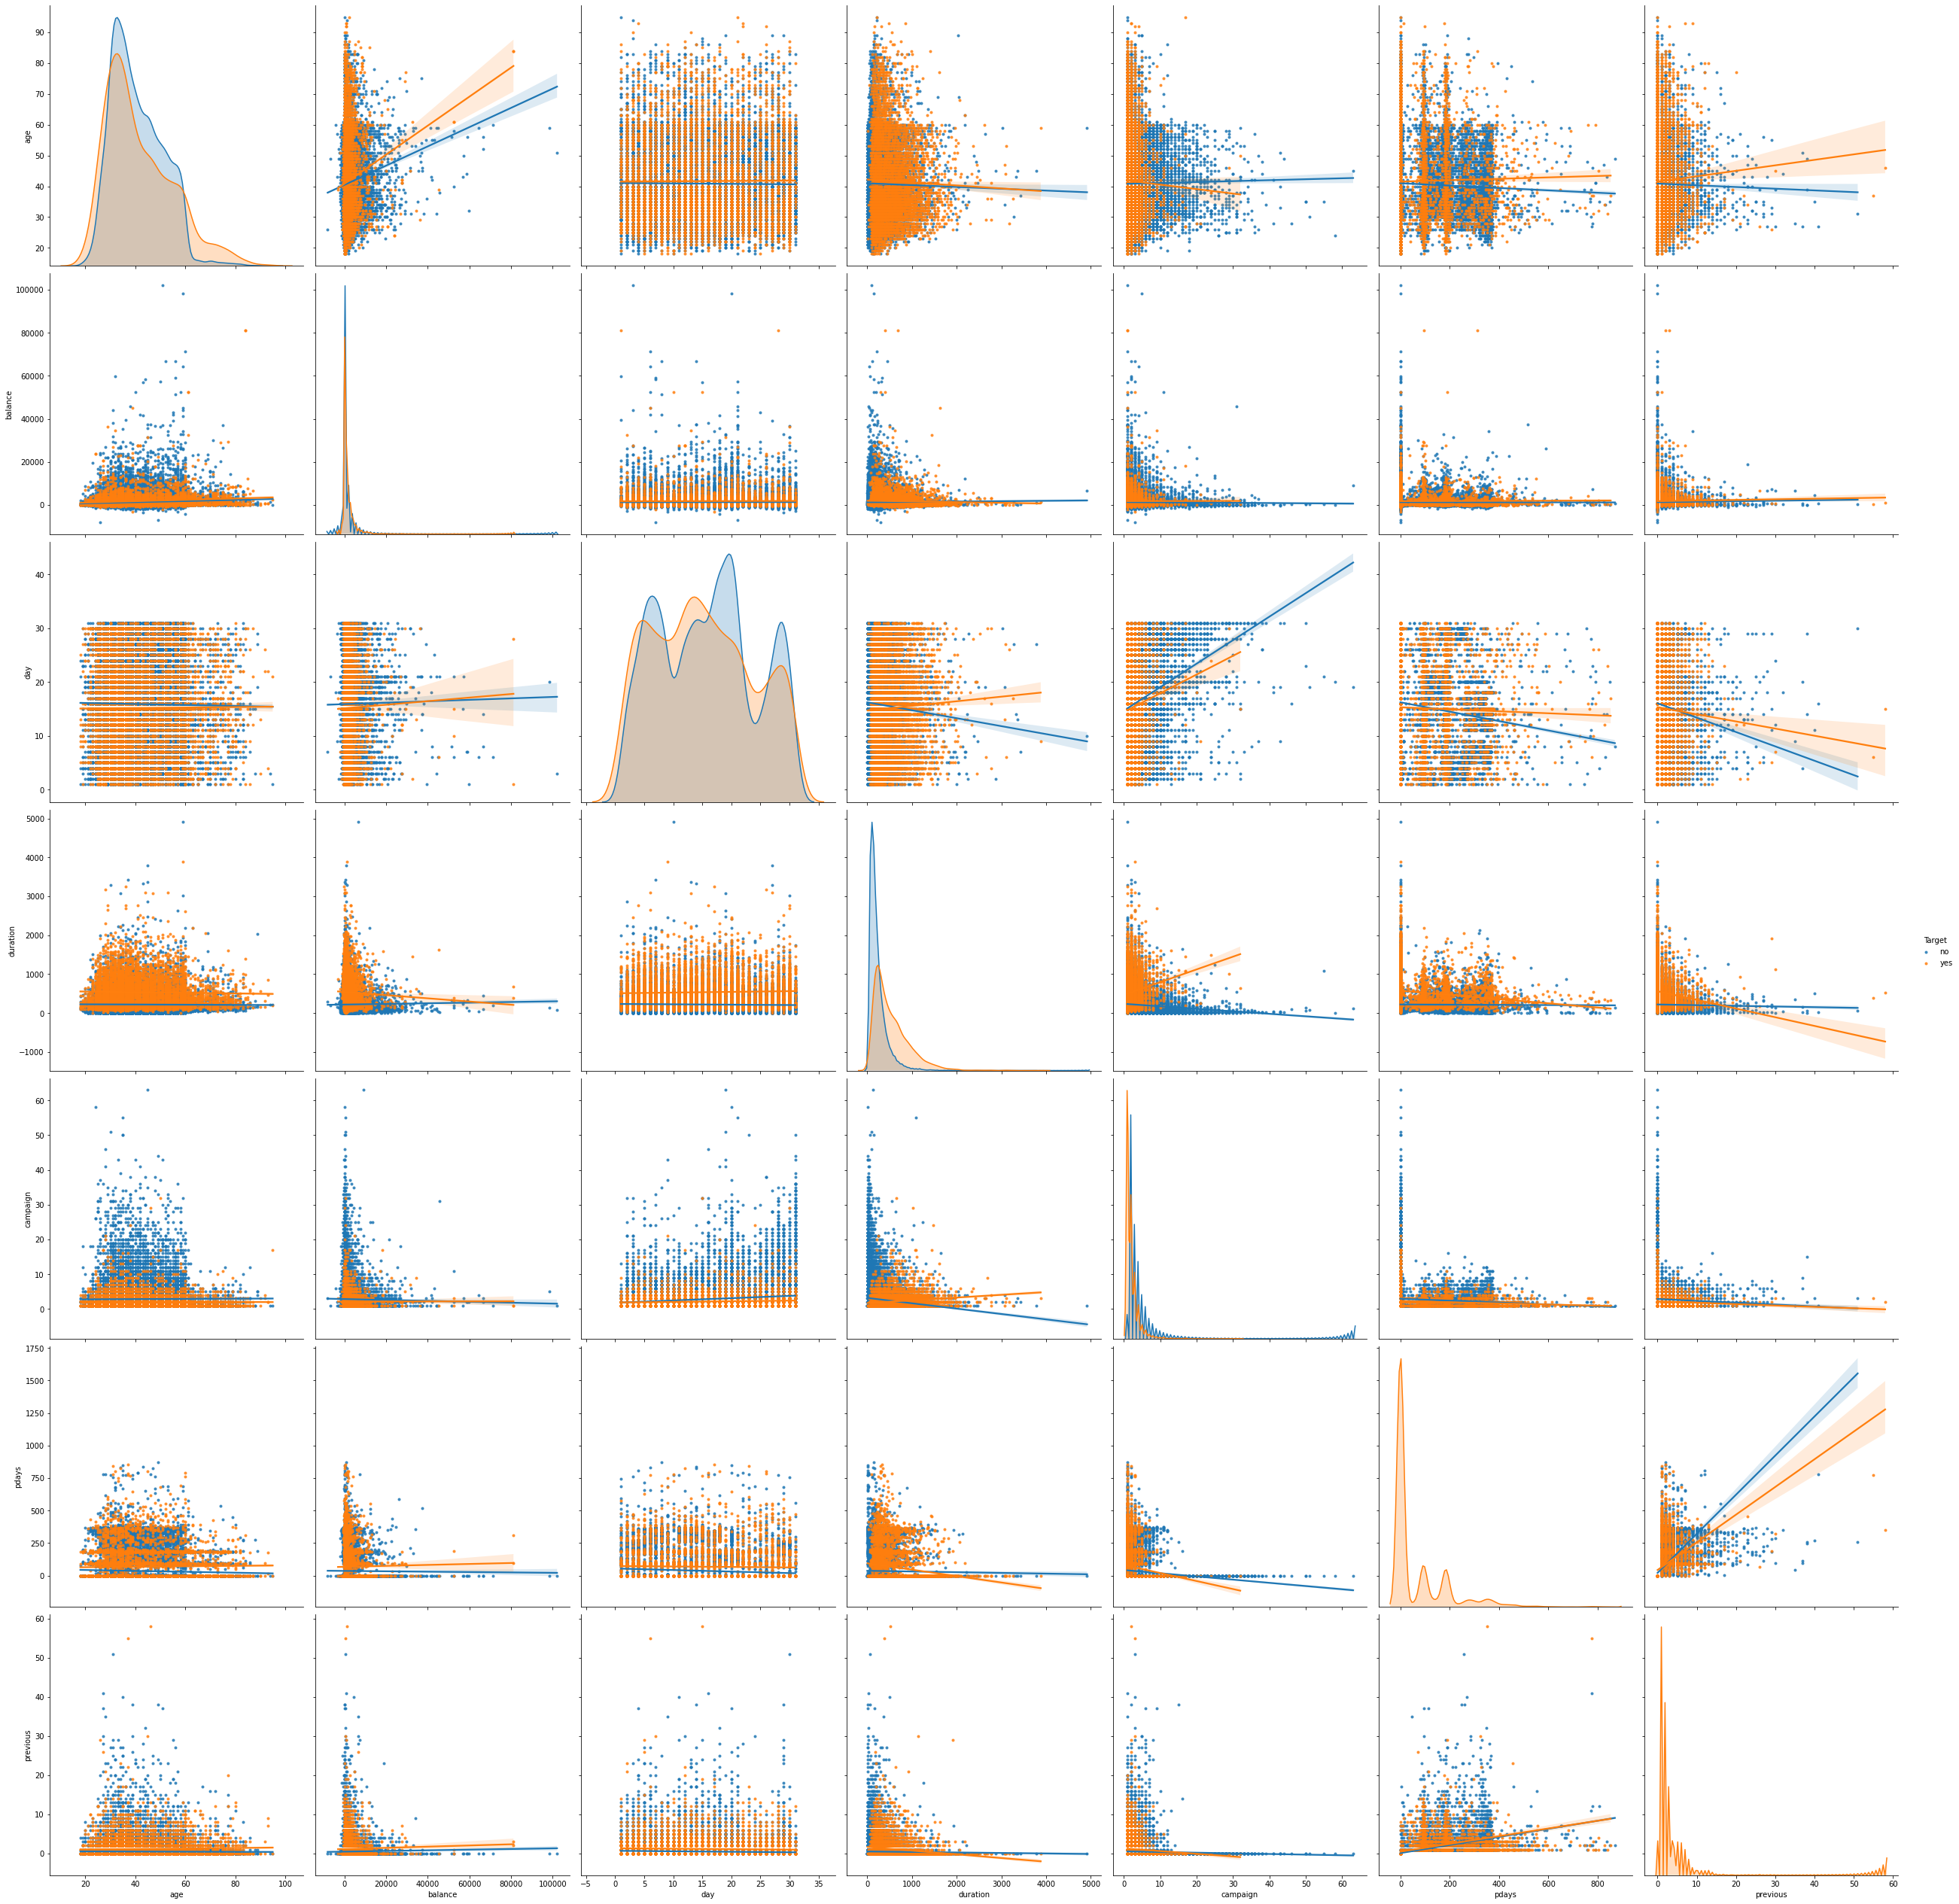

In [446]:
# previous has an outlier (275), let's see the data without it:
# Removing outlier to see rest of data better
# 
sns.pairplot(data=bank_data[bank_data.previous!=275][['age','previous','Target']], hue='Target', height=5, markers='.' );
sns.pairplot(data=bank_data[bank_data.previous!=275], hue='Target', height=5, markers='.', kind='reg' );



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


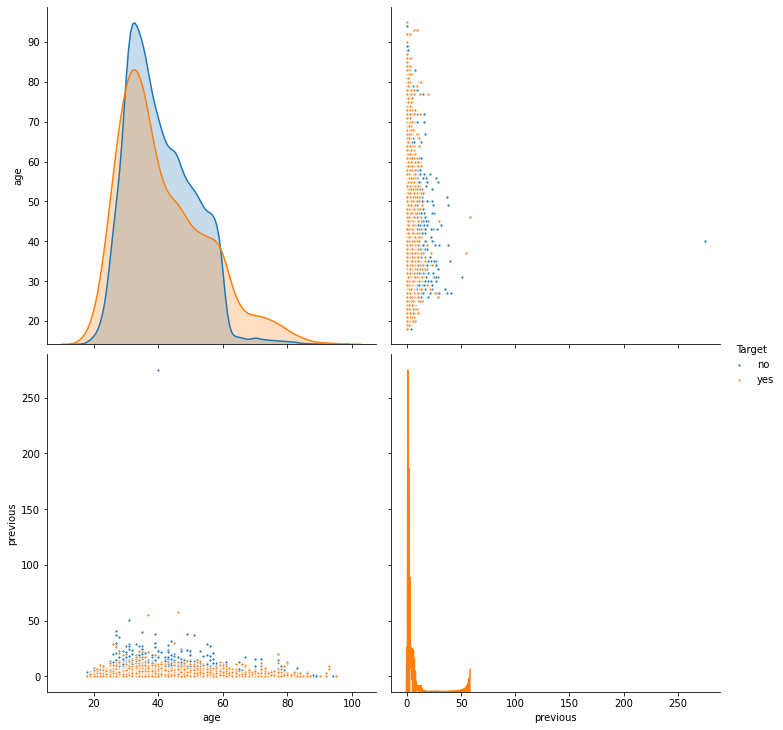

In [256]:
sns.pairplot(data=bank_data[['age','previous','Target']], hue='Target', height=5, markers='.' );

In [15]:
# TODO's: for regression, create dummies, then for decision trees try both with and without (original) data


In [451]:
bank_data.info()
bank_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

In [ ]:
# Make categorical variables


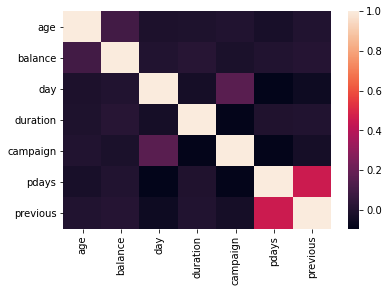

In [397]:
sns.heatmap(bank_data.corr())

# Deliverable – 2 (Prepare the data for analytics) – (10)

1. Ensure the attribute types are correct. If not, take appropriate actions.

2. Get the data model ready.

3. Transform the data i.e. scale / normalize if required

4. Create the training set and test set in ratio of 70:30


In [509]:
# Make categorical variables
bank_data2 = bank_data.copy()
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target' ]
for cat in cat_vars:
    bank_data2[cat] = bank_data2[cat].astype("category")

bank_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


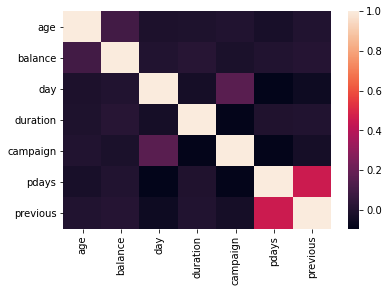

In [454]:
sns.heatmap(bank_data2.corr())

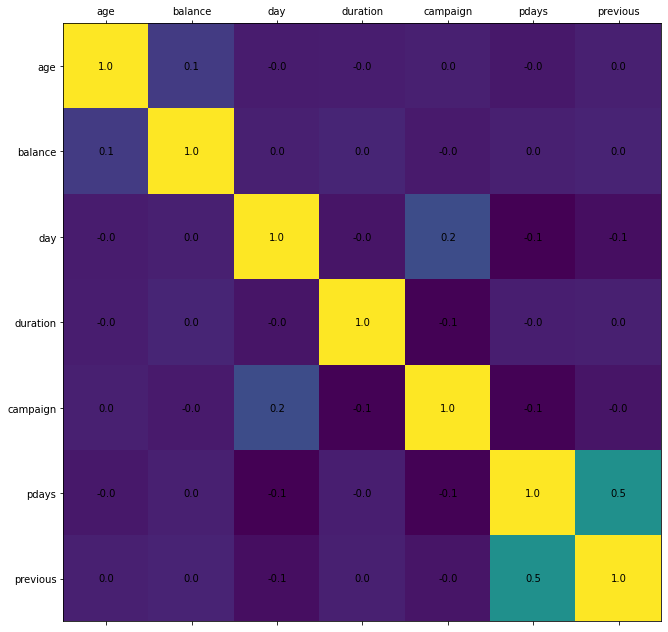

In [471]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plot_corr(bank_data2)

In [539]:
map = { 'no':0, 'yes':1}
bank_data2['TargetInt'] = bank_data2.Target.replace(map)
bank_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
 17  TargetInt  45211 non-null  int64   
dtypes: category(10), int64(8)
memory usage: 3.2 MB


In [683]:
# I will try different sets of data with the LogisticRegression model (to validate my knowledge mostly)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler,  MinMaxScaler
log_transformer = FunctionTransformer(np.log1p)

### Set 1: with dummies

X_cols = bank_data2.columns.difference(('Target','TargetInt'))
X1 = bank_data2[X_cols]
X_dummies = pd.get_dummies(X, drop_first=True)

x_train1, x_test1, y_train1, y_test1 = train_test_split(X_dummies, Y, test_size=.3, random_state=2)

Y = bank_data2[['TargetInt']]

print("Set 1:")
print(f"x_train1.shape{x_train1.shape}")
print(f"x_test1.shape{x_test1.shape}")
print(f"y_train1.shape{y_train1.shape}")
print(f"y_test1.shape{y_test1.shape}")


### Set 2: with int for categorical

bank_data3 = bank_data2.copy()

replace_struct = { 'job':job_map, 'marital':marital_map, 'education': education_map,
                    'default': default_map, 'housing':housing_map, 'loan': loan_map,
                 'contact': contact_map, 'month': month_map, 'poutcome': poutcome_map}

bank_data3 = bank_data3.replace(replace_struct)

X2 = bank_data3[X_cols]

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y, test_size=.3, random_state=2)

print("Set 2:")
print(f"x_train2.shape{x_train2.shape}")
print(f"x_test2.shape{x_test2.shape}")
print(f"y_train2.shape{y_train2.shape}")
print(f"y_test2.shape{y_test2.shape}")

### Set 3:

# Like Set 1 but removing variables with no predicting power Age, Default and Pday and
# removing one outlier from Previous (275 value)
# LogScale Previous!

bank_data4 = bank_data2.copy() #  didn't remove it in the end, it doesn't help! [bank_data2.previous!=275]

X_cols3 = bank_data4.columns.difference(('age', 'default', 'pdays', 'Target','TargetInt')) #  
X3 = bank_data4[X_cols3].copy()

#Transform 
from sklearn.preprocessing import FunctionTransformer   

X3.previous = log_transformer.fit_transform(X3.previous)   # Log Transform the attribute 
X3.duration = log_transformer.fit_transform(X3.duration)   # Log Transform the attribute 
X3.campaign = log_transformer.fit_transform(X3.campaign)   # Log Transform the attribute 

# Is it right to transform just 3 continuous variables and not ALL continuous variables? NOT SURE!

X3_dummies = pd.get_dummies(X3, drop_first=True)
Y2 = bank_data4[['TargetInt']]

x_train3, x_test3, y_train3, y_test3 = train_test_split(X3_dummies, Y2, test_size=.3, random_state=2)

print("Set 3:")
print(f"x_train3.shape{x_train3.shape}")
print(f"x_test3.shape{x_test3.shape}")
print(f"y_train3.shape{y_train3.shape}")
print(f"y_test3.shape{y_test3.shape}")

### Set 4:

# Take Set 1 and normalize and robust scale

bank_data5 = bank_data2.copy() # [bank_data2.previous!=275]

X_cols4 = bank_data5.columns.difference(('default', 'Target','TargetInt')) #  
X4 = bank_data5[X_cols4].copy()

#Transform 
scaler = RobustScaler() # For previous and duration that have outliers
X4.previous = scaler.fit_transform(X4[['previous']])
X4.duration = scaler.fit_transform(X4[['duration']])

scaler = StandardScaler() # For rest of variables
X4.age = scaler.fit_transform(X4[['age']])
X4.balance = scaler.fit_transform(X4[['balance']])
X4.day = scaler.fit_transform(X4[['day']])
X4.duration  = scaler.fit_transform(X4[['duration']])
X4.campaign = scaler.fit_transform(X4[['campaign']])

# Is it right to transform variables with different scalers? i.e. robust and standard? NOT SURE!!!

X4_dummies = pd.get_dummies(X4, drop_first=True)
Y4 = bank_data5[['TargetInt']]

x_train4, x_test4, y_train4, y_test4 = train_test_split(X4_dummies, Y4, test_size=.3, random_state=2)

print("Set 4:")
print(f"x_train4.shape{x_train4.shape}")
print(f"x_test4.shape{x_test4.shape}")
print(f"y_train4.shape{y_train4.shape}")
print(f"y_test4.shape{y_test4.shape}")



Set 1:
x_train1.shape(31647, 42)
x_test1.shape(13564, 42)
y_train1.shape(31647, 1)
y_test1.shape(13564, 1)
Set 2:
x_train2.shape(31647, 16)
x_test2.shape(13564, 16)
y_train2.shape(31647, 1)
y_test2.shape(13564, 1)
Set 3:
x_train3.shape(31647, 39)
x_test3.shape(13564, 39)
y_train3.shape(31647, 1)
y_test3.shape(13564, 1)
Set 4:
x_train4.shape(31647, 41)
x_test4.shape(13564, 41)
y_train4.shape(31647, 1)
y_test4.shape(13564, 1)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


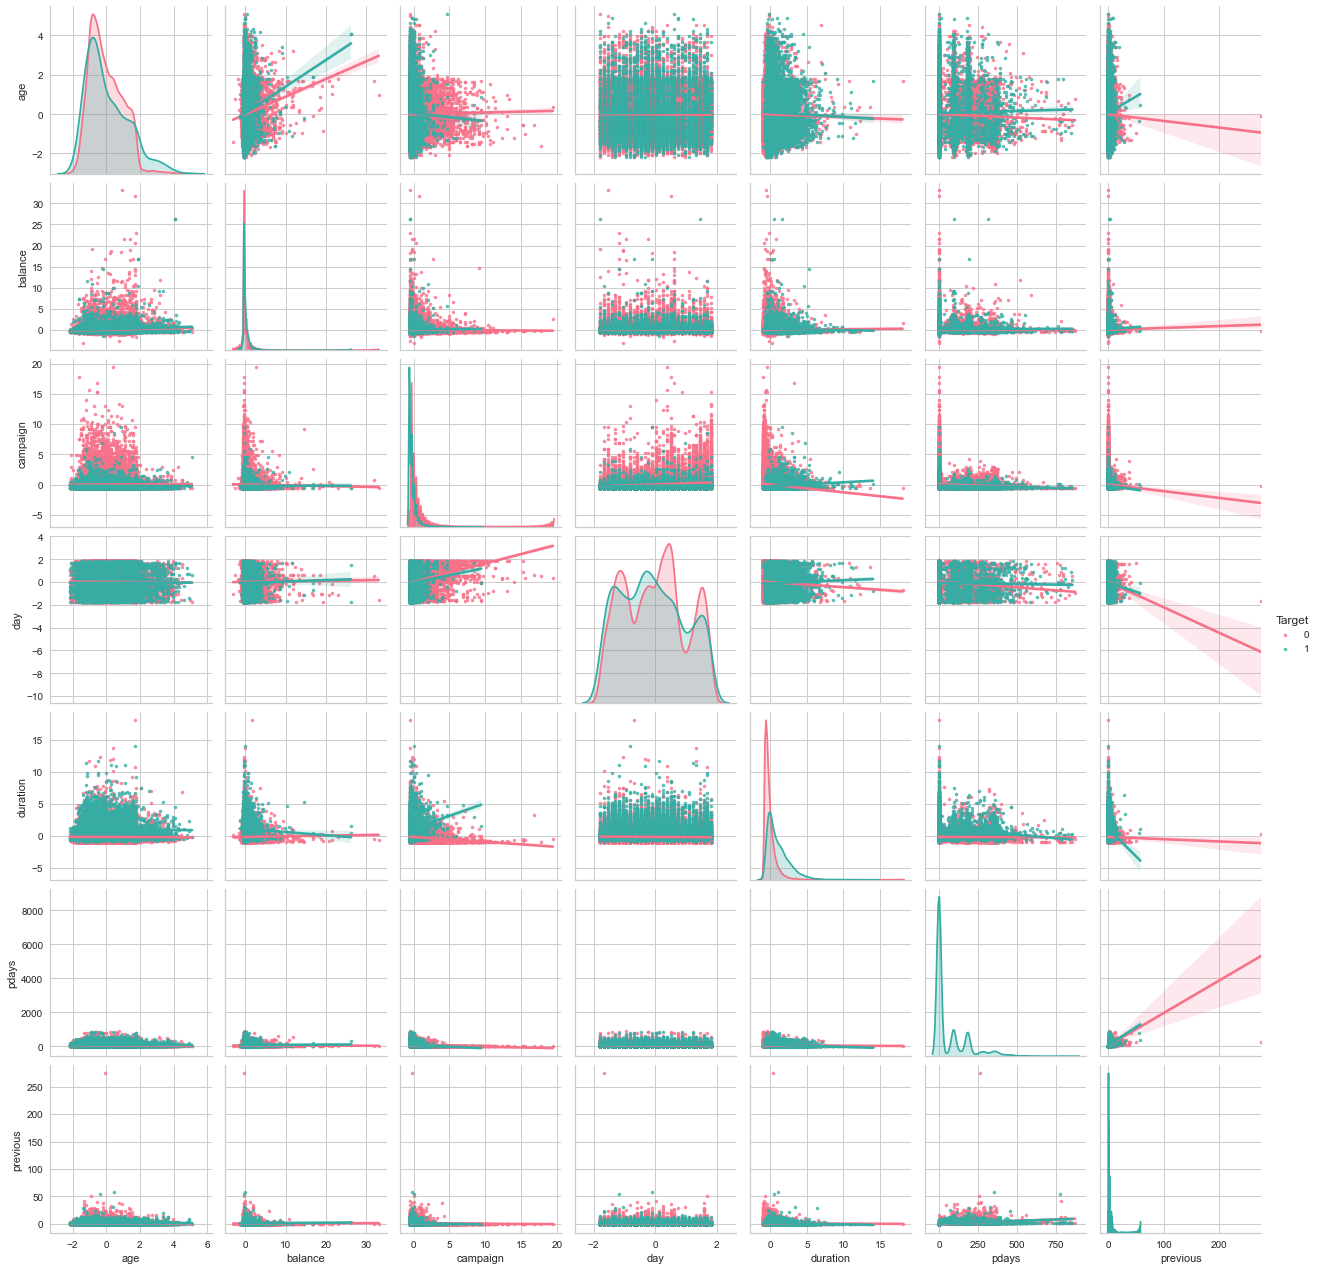

In [685]:
### Plotting the transformed data
XX = X4.copy()
XX['Target'] = Y4[['TargetInt']]

sns.pairplot(XX, hue="Target", palette='husl', markers='.', kind='reg'); #bank_data.previous!=275



# Deliverable – 3 (create the ensemble model) – (30)

1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

3. Make a DataFrame to compare models and their metrics. Give conclusion regarding
 the best algorithm and your reason behind it. (5 marks)


In [ ]:
# TODO's: get "master" f1 score for Decision Trees algos to compare them with Logistic Regression
# use parameter optimization for decision trees
# use bagging with Logistic Regression?
# use bagging with Decision Trees
# use Random Forests
# use Boosting - Ada and Gradient

In [620]:
# Logistic Regression
# Using statsmodel api, try out the different solvers and check the model performance and see parameters that seem significant
import statsmodels.api as sm
from scipy import stats

#y_train.value_counts()
print(x_train1.columns)
# 'newton’, ‘nm’, ‘bfgs’, ‘lbfgs’, ‘powell’, ‘cg’, ‘ncg’, ‘basinhopping’ ‘minimize’ for generic wrapper of scipy minimize

print("Set 1:")
for method in [ 'newton', 'nm', 'bfgs', 'lbfgs', 'powell', 'cg', 'ncg', 'basinhopping']:
    print(f"\n***********\n Method: {method}\n***********\n")
    logit = sm.Logit(y_train1, sm.add_constant(x_train1))
    lg = logit.fit(method=method, maxiter=100)
    stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
    print(lg.summary())
    lgcoef = pd.DataFrame(lg.params, columns=['coef'])
    lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
    lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
    lgcoef['pval']=lg.pvalues
    pd.options.display.float_format = '{:.2f}'.format
    lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
    pval_filter = lgcoef['pval'] <=0.05
    print(lgcoef[pval_filter])



Index(['age', 'balance', 'campaign', 'day', 'duration', 'pdays', 'previous',
       'contact_telephone', 'contact_unknown', 'default_yes',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'loan_yes', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')
Set 1:

***********
 Method: newton
***********

Optimization terminated successfully.
         Current function value: 0.240135
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              T

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide

         Current function value: 0.240178
         Iterations: 100
         Function evaluations: 113
         Gradient evaluations: 104
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31604
Method:                           MLE   Df Model:                           42
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3370
Time:                        11:24:48   Log-Likelihood:                -7600.9
converged:                      False   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1830      0.217    -10.050   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide

Optimization terminated successfully.
         Current function value: 0.240438
         Iterations: 17
         Function evaluations: 8427
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31604
Method:                           MLE   Df Model:                           42
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3363
Time:                        11:24:57   Log-Likelihood:                -7609.1
converged:                       True   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7183      0.220    -12.372

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.327585
         Iterations: 100
         Function evaluations: 236
         Gradient evaluations: 227
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31604
Method:                           MLE   Df Model:                           42
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                 0.09573
Time:                        11:24:58   Log-Likelihood:                -10367.
converged:                      False   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0020      0.193     -0.011   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




***********
 Method: basinhopping
***********



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 0: f 0.240135
basinhopping step 1: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 2: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 3: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 4: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 5: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 6: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 7: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 8: f 0.240135 trial_f 0.240135 accepted 1  lowest_f 0.240135
basinhopping step 9: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 10: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 11: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 12: f 0.240135 trial_f 0.240135 accepted 1  lowest_f 0.240135
basinhopping step 13: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 14: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 15: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 16: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: Runti

basinhopping step 17: f 0.240135 trial_f 0.240135 accepted 1  lowest_f 0.240135
found new global minimum on step 17 with function value 0.240135
basinhopping step 18: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 19: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 20: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 21: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 22: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 23: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 24: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 25: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 26: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 27: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 28: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 29: f 0.2401

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 31: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 32: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 33: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 34: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 35: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 36: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 37: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 38: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 39: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 40: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 41: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 42: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 43: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 44: f 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 57: f 0.240135 trial_f 0.240135 accepted 1  lowest_f 0.240135


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 58: f 0.240135 trial_f 0.240135 accepted 1  lowest_f 0.240135
basinhopping step 59: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 60: f 0.240135 trial_f 0.240135 accepted 1  lowest_f 0.240135
basinhopping step 61: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 62: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 63: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 64: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 65: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 66: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 67: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 68: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 69: f 0.240135 trial_f 0.240135 accepted 1  lowest_f 0.240135
basinhopping step 70: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 71: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 72: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 73: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 74: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 75: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 76: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 77: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 78: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 79: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 80: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 81: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 82

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 87: f 0.240135 trial_f 0.240135 accepted 1  lowest_f 0.240135
basinhopping step 88: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 89: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 90: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 91: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 92: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 93: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 94: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 95: f 0.240135 trial_f 0.240135 accepted 1  lowest_f 0.240135
basinhopping step 96: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 97: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 98: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
basinhopping step 99: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
adaptive stepsize: acceptance rate 0.090000 target 0.500000 new stepsize 0.405 old stepsize 0.45
basinhopping step 100: f 0.240135 trial_f inf accepted 0  lowest_f 0.240135
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31604
Method:                           MLE   Df Model:                           42
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3371
Time:                        11:25:04   Log-Likeliho

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

In [605]:
# Logit using Newton's method indicate top contributing variables are:
'''
poutcome_success    2.25        9.50         0.90  0.00
month_mar           1.55        4.72         0.83  0.00
month_oct           0.97        2.64         0.72  0.00
month_sep           0.85        2.33         0.70  0.00
month_dec           0.70        2.02         0.67  0.00
month_jun           0.43        1.53         0.61  0.00
job_student         0.36        1.43         0.59  0.01
education_tertiary  0.36        1.43         0.59  0.00
poutcome_other      0.21        1.24         0.55  0.05
day                 0.01        1.01         0.50  0.00
duration            0.00        1.00         0.50  0.00
balance             0.00        1.00         0.50  0.04
campaign           -0.11        0.89         0.47  0.00
marital_married    -0.17        0.84         0.46  0.02
contact_telephone  -0.18        0.84         0.46  0.04
job_technician     -0.21        0.81         0.45  0.01
job_services       -0.24        0.78         0.44  0.01
job_management     -0.24        0.78         0.44  0.01
job_blue-collar    -0.35        0.71         0.41  0.00
month_may          -0.42        0.66         0.40  0.00
loan_yes           -0.45        0.64         0.39  0.00
job_entrepreneur   -0.52        0.59         0.37  0.00
job_self-employed  -0.53        0.59         0.37  0.00
job_housemaid      -0.60        0.55         0.35  0.00
housing_yes        -0.66        0.52         0.34  0.00
month_aug          -0.68        0.51         0.34  0.00
month_jul          -0.79        0.45         0.31  0.00
month_nov          -0.98        0.37         0.27  0.00
month_jan          -1.24        0.29         0.22  0.00
contact_unknown    -1.61        0.20         0.17  0.00
const              -2.31        0.10         0.09  0.00'''
0

0

In [606]:
# Logistic Regression
# Using statsmodel api, try out the different solves and check the model performance and see parameters that seem significant
import statsmodels.api as sm
from scipy import stats

print("Set 2:")
#y_train.value_counts()
print(x_train1.columns)
# 'newton’, ‘nm’, ‘bfgs’, ‘lbfgs’, ‘powell’, ‘cg’, ‘ncg’, ‘basinhopping’ ‘minimize’ for generic wrapper of scipy minimize
for method in [ 'newton', 'nm', 'bfgs', 'lbfgs', 'powell', 'cg', 'ncg', 'basinhopping']:
    print(f"\n***********\n Method: {method}\n***********\n")
    logit = sm.Logit(y_train2, sm.add_constant(x_train2))
    lg = logit.fit(method=method, maxiter=100)
    stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
    print(lg.summary())
    lgcoef = pd.DataFrame(lg.params, columns=['coef'])
    lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
    lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
    lgcoef['pval']=lg.pvalues
    pd.options.display.float_format = '{:.2f}'.format
    lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
    pval_filter = lgcoef['pval'] <=0.05
    print(lgcoef[pval_filter])



Set 2:
Index(['age', 'balance', 'campaign', 'day', 'duration', 'pdays', 'previous',
       'contact_telephone', 'contact_unknown', 'default_yes',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'loan_yes', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

***********
 Method: newton
***********

Optimization terminated successfully.
         Current function value: 0.258285
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              T

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide

Optimization terminated successfully.
         Current function value: 0.258285
         Iterations: 81
         Function evaluations: 94
         Gradient evaluations: 85
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31630
Method:                           MLE   Df Model:                           16
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.2870
Time:                        10:57:52   Log-Likelihood:                -8173.9
converged:                       True   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2259      0.115    -2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in doub

Optimization terminated successfully.
         Current function value: 0.258374
         Iterations: 13
         Function evaluations: 3012
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31630
Method:                           MLE   Df Model:                           16
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.2868
Time:                        10:57:54   Log-Likelihood:                -8176.8
converged:                       True   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0551      0.115    -26.591      0.000      -3.280    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.330561
         Iterations: 100
         Function evaluations: 234
         Gradient evaluations: 225
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31630
Method:                           MLE   Df Model:                           16
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                 0.08751
Time:                        10:57:55   Log-Likelihood:                -10461.
converged:                      False   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.101     -0.016      0.987      -0.200       

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide

basinhopping step 0: f 0.258285
basinhopping step 1: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 2: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 3: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 4: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 5: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 6: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 7: f 0.258285 trial_f 0.258285 accepted 1  lowest_f 0.258285
basinhopping step 8: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 9: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 10: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 11: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 12: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 13: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 14: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 15: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 16: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 17: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 18: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 19: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 20: f

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)



basinhopping step 23: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 24: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 25: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 26: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 27: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 28: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 29: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 30: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 31: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 32: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 33: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 34: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 35: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 36: f 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 76: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 77: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 78: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 79: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 80: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 81: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 82: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 83: f 0.258285 trial_f 5.1657 accepted 0  lowest_f 0.258285
basinhopping step 84: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 85: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 86: f 0.258285 trial_f 14.7496 accepted 0  lowest_f 0.258285
basinhopping step 87: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 88: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runt

basinhopping step 95: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 96: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 97: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 98: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
basinhopping step 99: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
adaptive stepsize: acceptance rate 0.010000 target 0.500000 new stepsize 0.405 old stepsize 0.45
basinhopping step 100: f 0.258285 trial_f inf accepted 0  lowest_f 0.258285
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31630
Method:                           MLE   Df Model:                           16
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.2870
Time:                        10:57:56   Log-Likelihood:  

In [616]:
# Logistic Regression
# Using statsmodel api, try out the different solves and check the model performance and see parameters that seem significant
import statsmodels.api as sm
from scipy import stats

print("Set 3:")
#y_train.value_counts()
print(x_train1.columns)
# 'newton’, ‘nm’, ‘bfgs’, ‘lbfgs’, ‘powell’, ‘cg’, ‘ncg’, ‘basinhopping’ ‘minimize’ for generic wrapper of scipy minimize
for method in [ 'newton', 'nm', 'bfgs', 'lbfgs', 'powell', 'cg', 'ncg', 'basinhopping']:
    print(f"\n***********\n Method: {method}\n***********\n")
    logit = sm.Logit(y_train3, sm.add_constant(x_train3))
    lg = logit.fit(method=method, maxiter=100)
    stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
    print(lg.summary())
    lgcoef = pd.DataFrame(lg.params, columns=['coef'])
    lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
    lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
    lgcoef['pval']=lg.pvalues
    pd.options.display.float_format = '{:.2f}'.format
    lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
    pval_filter = lgcoef['pval'] <=0.05
    print(lgcoef[pval_filter])



Set 3:
Index(['age', 'balance', 'campaign', 'day', 'duration', 'pdays', 'previous',
       'contact_telephone', 'contact_unknown', 'default_yes',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'loan_yes', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

***********
 Method: newton
***********

Optimization terminated successfully.
         Current function value: 0.227870
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              T

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide

         Current function value: 0.228312
         Iterations: 100
         Function evaluations: 113
         Gradient evaluations: 104
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31607
Method:                           MLE   Df Model:                           39
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3695
Time:                        11:22:34   Log-Likelihood:                -7225.4
converged:                      False   LL-Null:                       -11461.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -11.4409      0.264    -43.387   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide

Optimization terminated successfully.
         Current function value: 0.227898
         Iterations: 34
         Function evaluations: 15158
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31607
Method:                           MLE   Df Model:                           39
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3707
Time:                        11:22:51   Log-Likelihood:                -7212.3
converged:                       True   LL-Null:                       -11461.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -11.8349      0.266    -44.44

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

         Current function value: 0.384842
         Iterations: 12
         Function evaluations: 62
         Gradient evaluations: 41
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31607
Method:                           MLE   Df Model:                           39
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                -0.06270
Time:                        11:22:52   Log-Likelihood:                -12179.
converged:                      False   LL-Null:                       -11461.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0527      0.167     -0.317      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 0: f 0.22787
basinhopping step 1: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 2: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 3: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 4: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 5: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 6: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 7: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 8: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 9: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 10: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 11: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 12: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 13: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 14: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 15: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 16: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 17: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 18: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 19: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 20: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 21: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 22: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 23: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 24: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 25: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 26: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 27: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 28: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 29: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 30: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 31: f 0.22787 trial_f 0.774932 accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 32: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 33: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 34: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 35: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 36: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 37: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 38: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 39: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 40: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 41: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 42: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 43: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 44: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 45: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 46: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 47: f 0.22787 trial_f 0.769322 accepted 0  lowest_f 0.22787
basinhopping step 48: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 49: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
adaptive stepsize: acceptance rate 0.260000 target 0.500000 new stepsize 0.45 old stepsize 0.5
basinhopping step 50: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 51: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 52: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 53: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 54: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 55: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 56: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 57: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 58: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 59: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 60: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 61: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 62: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 63: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 64: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 65: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 66: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 67: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 68: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 69: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 70: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 71: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 72: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 73: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 74: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 75: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 76: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 77: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 78: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 79: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 80: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 81: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 82: f 0.894634 trial_f 0.894634 accepted 1  lowest_f 0.22787
basinhopping step 83: f 0.894634 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 84: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 85: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 86: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


basinhopping step 87: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 88: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 89: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 90: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 91: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 92: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
basinhopping step 93: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: Runti

basinhopping step 94: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 95: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 96: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 97: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encount

basinhopping step 98: f 0.22787 trial_f 0.22787 accepted 1  lowest_f 0.22787
basinhopping step 99: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
adaptive stepsize: acceptance rate 0.280000 target 0.500000 new stepsize 0.405 old stepsize 0.45
basinhopping step 100: f 0.22787 trial_f inf accepted 0  lowest_f 0.22787
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31607
Method:                           MLE   Df Model:                           39
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3708
Time:                        11:23:03   Log-Likelihood:                -7211.4
converged:                       True   LL-Null:                       -11461.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


In [686]:
# Logistic Regression
# Using statsmodel api, try out the different solves and check the model performance and see parameters that seem significant
import statsmodels.api as sm
from scipy import stats

print("Set 4:")
#y_train.value_counts()
print(x_train1.columns)
# 'newton’, ‘nm’, ‘bfgs’, ‘lbfgs’, ‘powell’, ‘cg’, ‘ncg’, ‘basinhopping’ ‘minimize’ for generic wrapper of scipy minimize
for method in [ 'newton', 'nm', 'bfgs', 'lbfgs', 'powell', 'cg', 'ncg', 'basinhopping']:
    print(f"\n***********\n Method: {method}\n***********\n")
    logit = sm.Logit(y_train4, sm.add_constant(x_train4))
    lg = logit.fit(method=method, maxiter=100)
    stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
    print(lg.summary())
    lgcoef = pd.DataFrame(lg.params, columns=['coef'])
    lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
    lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
    lgcoef['pval']=lg.pvalues
    pd.options.display.float_format = '{:.2f}'.format
    lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
    pval_filter = lgcoef['pval'] <=0.05
    print(lgcoef[pval_filter])



Set 4:
Index(['age', 'balance', 'campaign', 'day', 'duration', 'pdays', 'previous',
       'contact_telephone', 'contact_unknown', 'default_yes',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'loan_yes', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

***********
 Method: newton
***********

Optimization terminated successfully.
         Current function value: 0.240140
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              T

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide

         Current function value: 0.240165
         Iterations: 100
         Function evaluations: 109
         Gradient evaluations: 105
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31605
Method:                           MLE   Df Model:                           41
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3370
Time:                        16:26:19   Log-Likelihood:                -7600.5
converged:                      False   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2927      0.169     -7.645   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31605
Method:                           MLE   Df Model:                           41
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                 -0.9134
Time:                        16:26:19   Log-Likelihood:                -21936.
converged:                       True   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                        0      0.102          0      1.000      -0.200       0.200
age                          0      0.015          0      1.000      -0.029       0.029
balance         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: 0.240396
         Iterations: 10
         Function evaluations: 4635
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31605
Method:                           MLE   Df Model:                           41
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3364
Time:                        16:26:25   Log-Likelihood:                -7607.8
converged:                       True   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9624      0.173    -11.340

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.241632
         Iterations: 100
         Function evaluations: 295
         Gradient evaluations: 291
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31605
Method:                           MLE   Df Model:                           41
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3330
Time:                        16:26:26   Log-Likelihood:                -7646.9
converged:                      False   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6983      0.164     -4.252   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31605
Method:                           MLE   Df Model:                           41
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.2326
Time:                        16:26:26   Log-Likelihood:                -8797.5
converged:                       True   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6837      0.150     -4.554      0.000      -0.978      -0.389
age                     0.0108      0.025      0.438      0.661      -0.037       0.059
balance         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 0: f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 1: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
found new global minimum on step 1 with function value 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 2: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 3: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 4: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


basinhopping step 5: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 6: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 7: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 8: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
found new global minimum on step 8 with function value 0.24014
basinhopping step 9: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 10: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
found new global minimum on step 10 with function value 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 11: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 12: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 13: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 14: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 15: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 16: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 17: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 18: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 19: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 20: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 21: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 22: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 23: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 24: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 25: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 26: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 27: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 28: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 29: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 30: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 31: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 32: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 33: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 34: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 35: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 36: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 37: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 38: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 39: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 40: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 41: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 42: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
found new global minimum on step 42 with function value 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 43: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 44: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 45: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 46: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 47: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 48: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 49: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
adaptive stepsize: acceptance rate 0.980000 target 0.500000 new stepsize 0.555556 old stepsize 0.5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 50: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 51: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 52: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 53: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 54: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 55: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 56: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 57: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 58: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 59: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 60: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 61: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 62: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 63: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


basinhopping step 64: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 65: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 66: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 67: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 68: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 69: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 70: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 71: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 72: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 73: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


basinhopping step 74: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 75: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 76: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 77: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 78: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 79: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 80: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 81: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 82: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 83: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 84: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 85: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 86: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 87: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 88: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 89: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 90: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 91: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 92: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 93: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 94: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 95: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 96: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
basinhopping step 97: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 98: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 99: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
adaptive stepsize: acceptance rate 0.990000 target 0.500000 new stepsize 0.617284 old stepsize 0.555556


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 100: f 0.24014 trial_f 0.24014 accepted 1  lowest_f 0.24014
                           Logit Regression Results                           
Dep. Variable:              TargetInt   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31605
Method:                           MLE   Df Model:                           41
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3371
Time:                        16:27:09   Log-Likelihood:                -7599.7
converged:                       True   LL-Null:                       -11465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3374      0.169     -7.905      0.000      -1.669      -1.006
age                    -0.

******************
Solver: liblinear for set: Set1
******************
[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training accuracy: 0.9012860618700035
Testing accuracy: 0.9041580654674137
Accuracy: 0.9041580654674137
Precision: 0.6549707602339181
Recall: 0.35782747603833864
F1: 0.4628099173553719
Roc Auc Score: 0.6666210469615812 


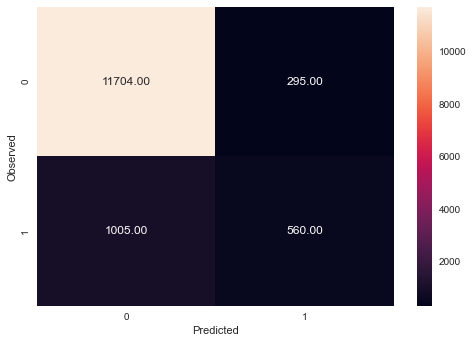

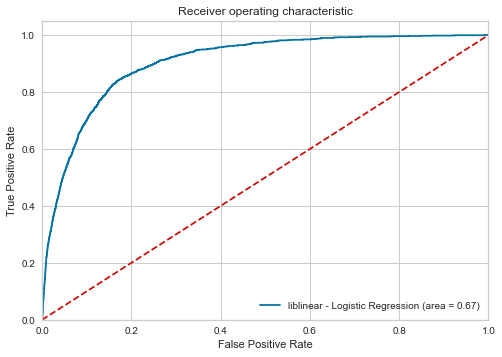

******************
Solver: newton-cg for set: Set1
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training accuracy: 0.901033273296047
Testing accuracy: 0.9040106163373636
Accuracy: 0.9040106163373636
Precision: 0.6541617819460727
Recall: 0.35654952076677315
F1: 0.4615384615384615
Roc Auc Score: 0.6659820693257984 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished


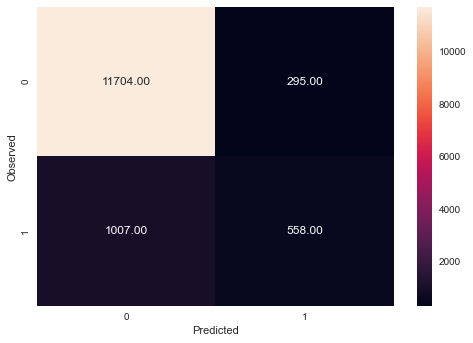

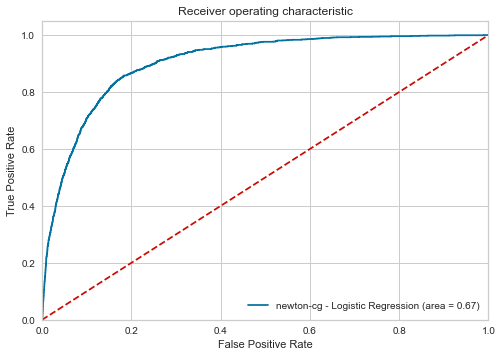

******************
Solver: lbfgs for set: Set1
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finis

Training accuracy: 0.8908585331942996
Testing accuracy: 0.8928044824535535
Accuracy: 0.8928044824535535
Precision: 0.5961871750433275
Recall: 0.21980830670926518
F1: 0.3211951447245565
Roc Auc Score: 0.6001950109260968 


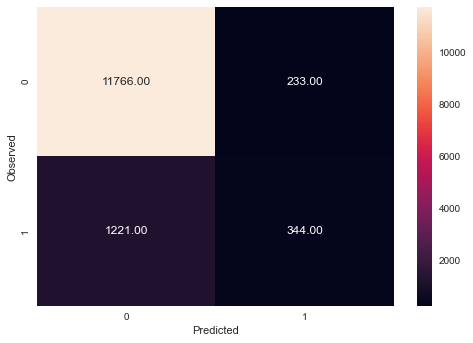

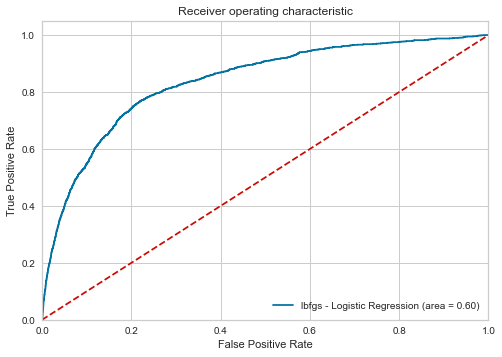

******************
Solver: sag for set: Set1
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds
Training accuracy: 0.8822637216797801
Testing accuracy: 0.884473606605721
Accuracy: 0.884473606605721
Precision: 0.0
Recall: 0.0
F1: 0.0
Roc Auc Score: 0.49991665972164345 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


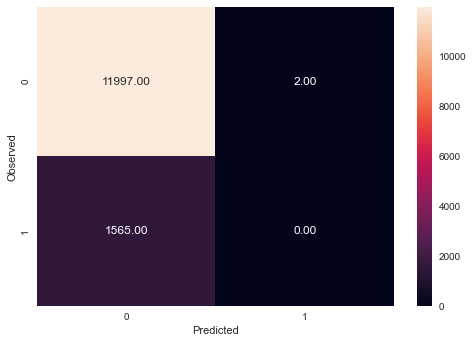

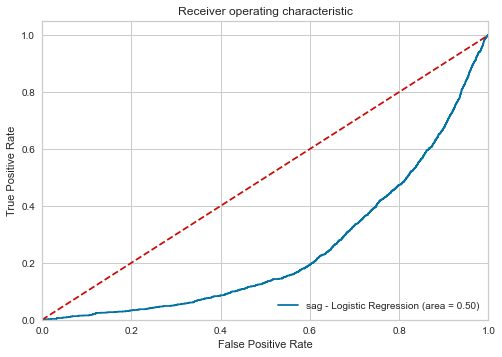

******************
Solver: saga for set: Set1
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds
Training accuracy: 0.8819161373905899
Testing accuracy: 0.8837363609554704
Accuracy: 0.8837363609554704
Precision: 0.0
Recall: 0.0
F1: 0.0
Roc Auc Score: 0.4994999583298608 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


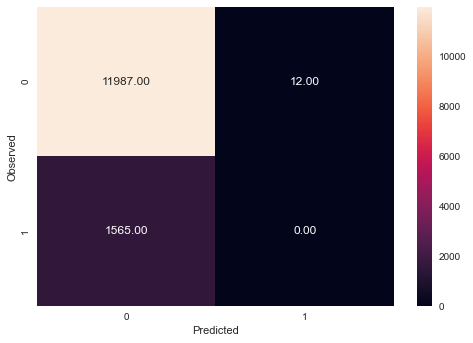

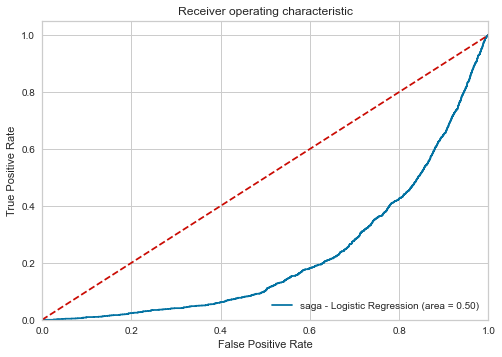

******************
Solver: liblinear for set: Set2
******************
[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training accuracy: 0.8974942332606566
Testing accuracy: 0.9009879091713359
Accuracy: 0.9009879091713359
Precision: 0.6495956873315364
Recall: 0.3079872204472843
F1: 0.4178586909406155
Roc Auc Score: 0.6431593740372932 


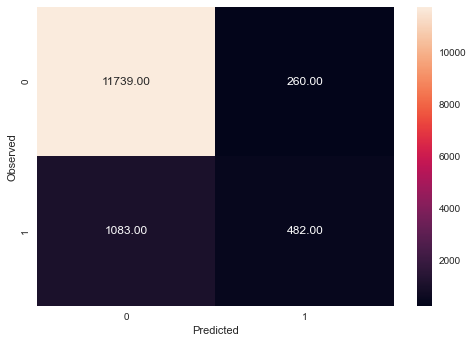

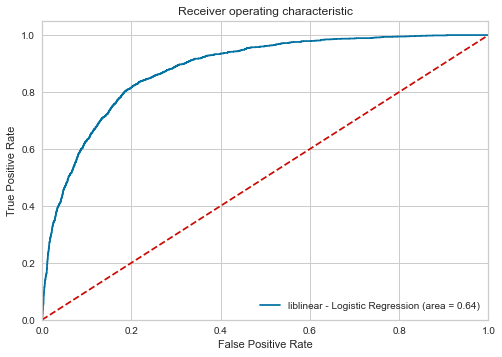

******************
Solver: newton-cg for set: Set2
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training accuracy: 0.8977470218346131
Testing accuracy: 0.9015039811265113
Accuracy: 0.9015039811265113
Precision: 0.6532797858099063
Recall: 0.31182108626198085
F1: 0.4221453287197232
Roc Auc Score: 0.6451179770838198 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


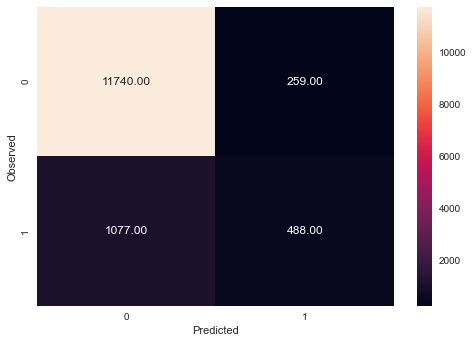

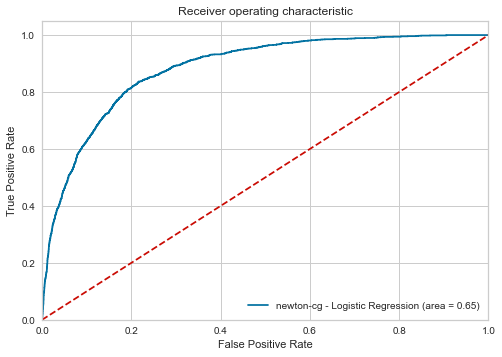

******************
Solver: lbfgs for set: Set2
******************
Training accuracy: 0.8878566688785667
Testing accuracy: 0.8898554998525509
Accuracy: 0.8898554998525509
Precision: 0.5617391304347826
Recall: 0.2063897763578275
F1: 0.3018691588785047
Roc Auc Score: 0.592694013105991 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finis

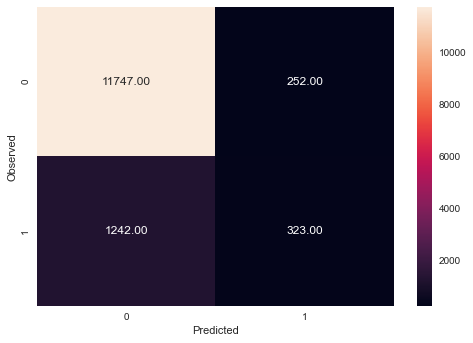

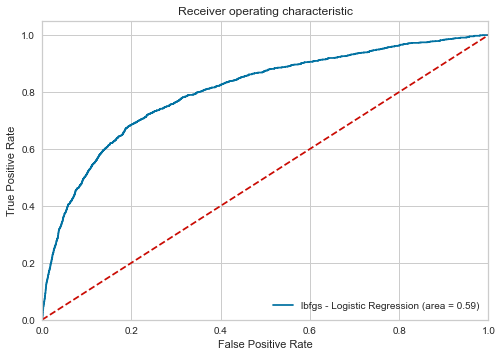

******************
Solver: sag for set: Set2
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds
Training accuracy: 0.8822953202515247
Testing accuracy: 0.884473606605721
Accuracy: 0.884473606605721
Precision: 0.0
Recall: 0.0
F1: 0.0
Roc Auc Score: 0.49991665972164345 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


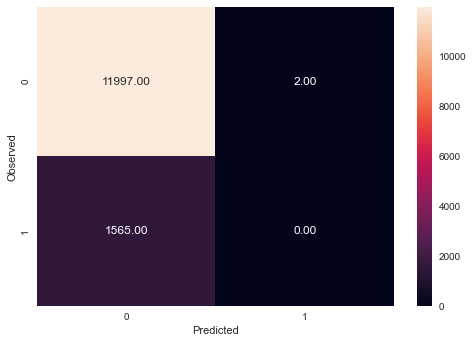

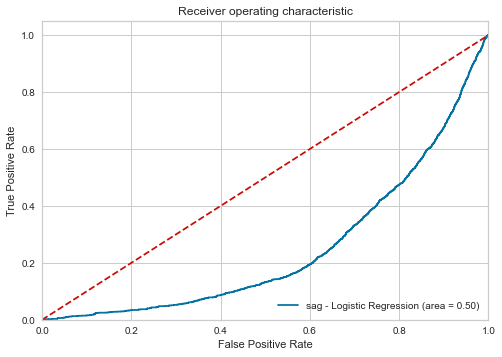

******************
Solver: saga for set: Set2
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds
Training accuracy: 0.8819477359623346
Testing accuracy: 0.8838838100855205
Accuracy: 0.8838838100855205
Precision: 0.0
Recall: 0.0
F1: 0.0
Roc Auc Score: 0.4995832986082174 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


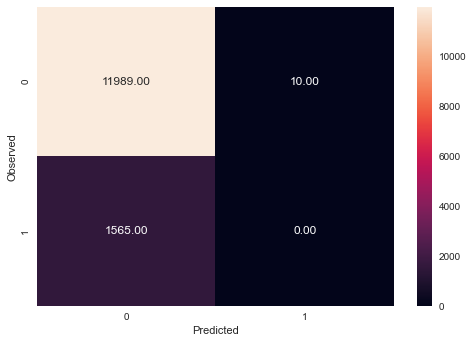

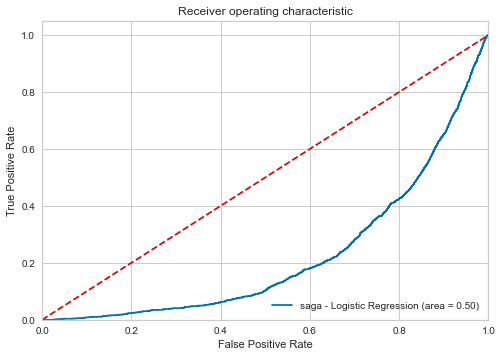

******************
Solver: liblinear for set: Set3
******************
[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training accuracy: 0.9013492590134926
Testing accuracy: 0.9034945443821881
Accuracy: 0.9034945443821881
Precision: 0.6620253164556962
Recall: 0.334185303514377
F1: 0.44416135881104035
Roc Auc Score: 0.6559667245965918 


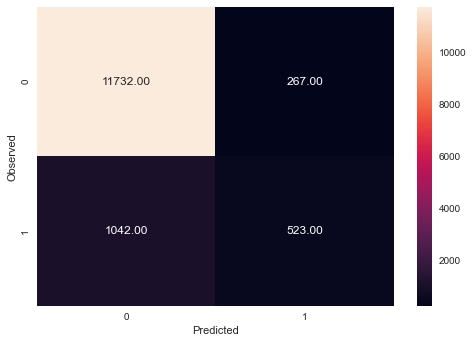

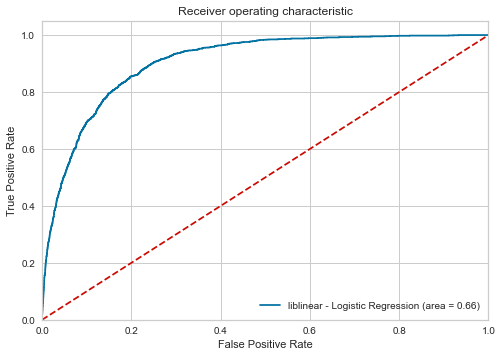

******************
Solver: newton-cg for set: Set3
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training accuracy: 0.9027395961702531
Testing accuracy: 0.9037894426422884
Accuracy: 0.9037894426422884
Precision: 0.6484018264840182
Recall: 0.36293929712460066
F1: 0.46538303973781237
Roc Auc Score: 0.6686352456953948 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


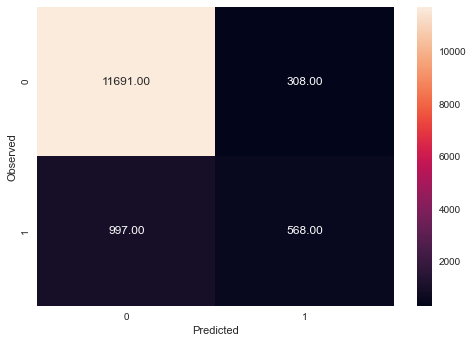

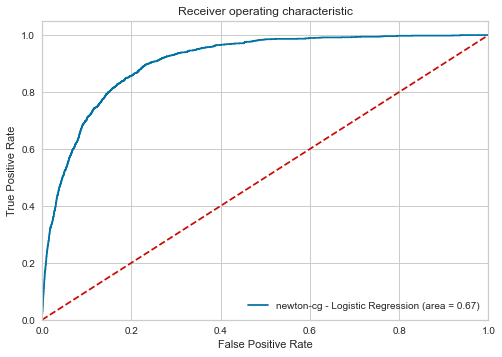

******************
Solver: lbfgs for set: Set3
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training accuracy: 0.8890890131766044
Testing accuracy: 0.8920672368033029
Accuracy: 0.8920672368033029
Precision: 0.5763993948562783
Recall: 0.24345047923322682
F1: 0.34231805929919135
Roc Auc Score: 0.6100576006466992 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


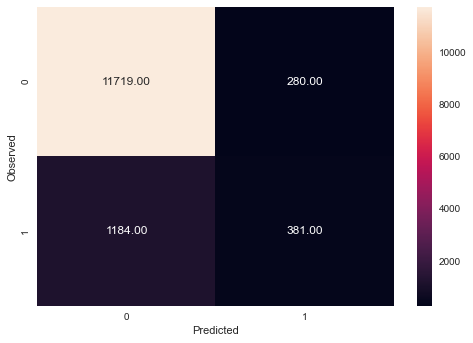

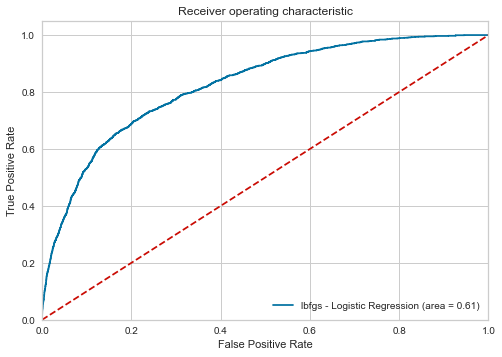

******************
Solver: sag for set: Set3
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds
Training accuracy: 0.8411855784118558
Testing accuracy: 0.8484222943084636
Accuracy: 0.8484222943084636
Precision: 0.06082289803220036
Recall: 0.021725239616613417
F1: 0.032015065913371
Roc Auc Score: 0.48898579673971765 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


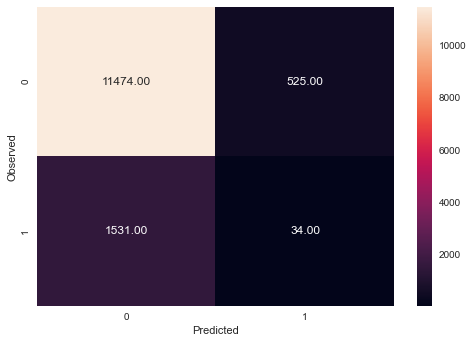

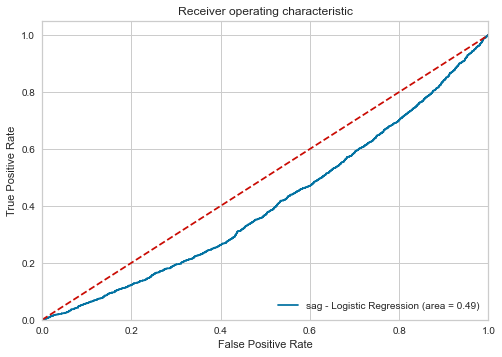

******************
Solver: saga for set: Set3
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds
Training accuracy: 0.8266818339811041
Testing accuracy: 0.8329401356531997
Accuracy: 0.8329401356531997
Precision: 0.05121638924455826
Recall: 0.025559105431309903
F1: 0.0341005967604433
Roc Auc Score: 0.48190197958456066 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


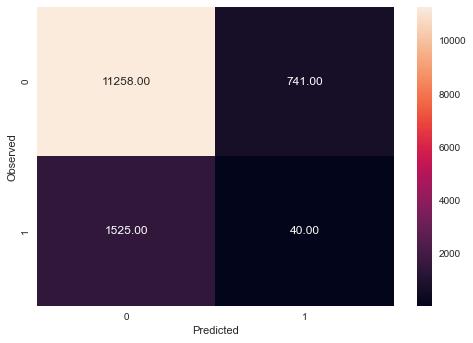

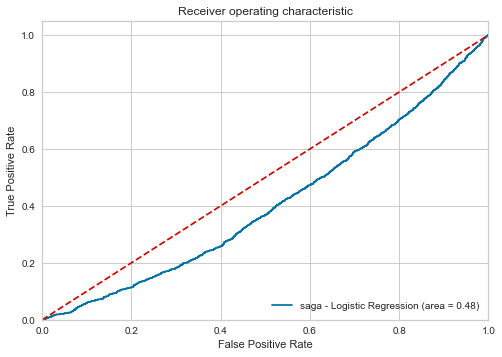

******************
Solver: liblinear for set: Set4
******************
[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training accuracy: 0.901033273296047
Testing accuracy: 0.9040843409023887
Accuracy: 0.9040843409023887
Precision: 0.6549295774647887
Recall: 0.35654952076677315
F1: 0.4617294166321886
Roc Auc Score: 0.6660237394649766 


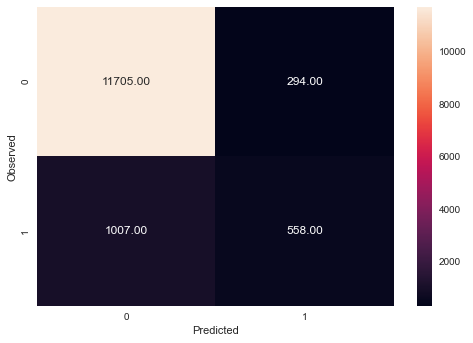

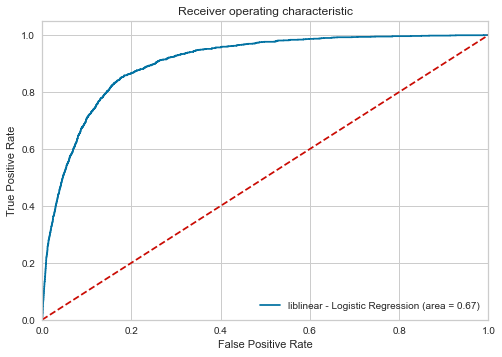

******************
Solver: newton-cg for set: Set4
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training accuracy: 0.9010964704395361
Testing accuracy: 0.9040106163373636
Accuracy: 0.9040106163373636
Precision: 0.6541617819460727
Recall: 0.35654952076677315
F1: 0.4615384615384615
Roc Auc Score: 0.6659820693257984 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


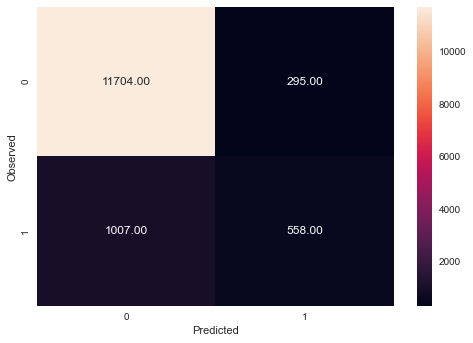

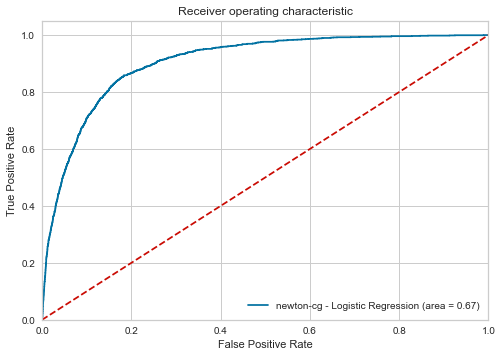

******************
Solver: lbfgs for set: Set4
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training accuracy: 0.9006856890068569
Testing accuracy: 0.904452963727514
Accuracy: 0.904452963727514
Precision: 0.6565774155995343
Recall: 0.3603833865814696
F1: 0.4653465346534653
Roc Auc Score: 0.6678990022331467 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


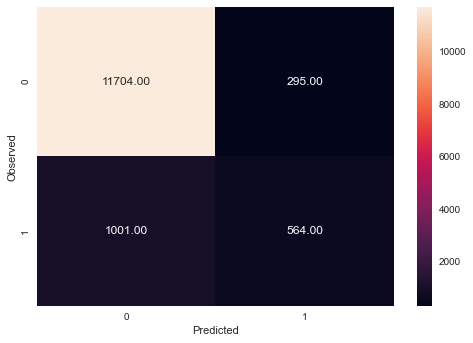

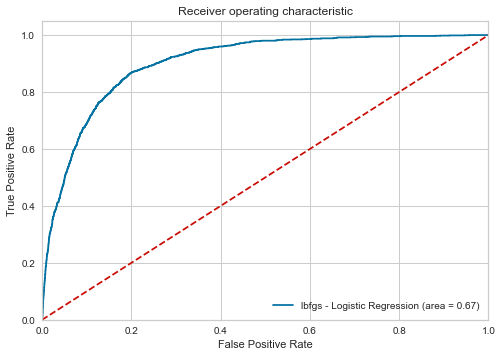

******************
Solver: sag for set: Set4
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds
Training accuracy: 0.8889942174613708
Testing accuracy: 0.8936154526688292
Accuracy: 0.8936154526688292
Precision: 0.6556122448979592
Recall: 0.16421725239616614
F1: 0.26264690853346956
Roc Auc Score: 0.5764831574090172 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


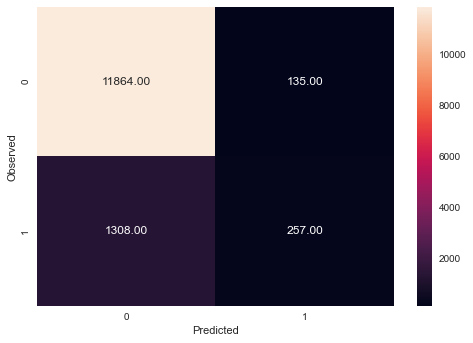

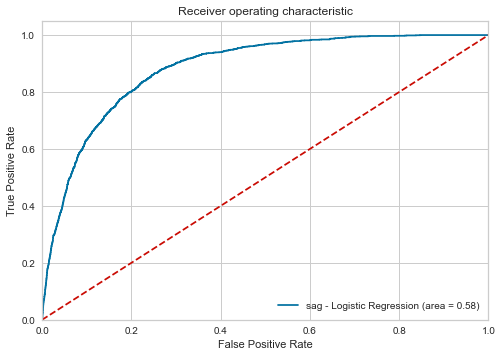

******************
Solver: saga for set: Set4
******************


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds
Training accuracy: 0.8860239517173824
Testing accuracy: 0.8905927455028015
Accuracy: 0.8905927455028015
Precision: 0.6738197424892703
Recall: 0.10031948881789138
F1: 0.17463848720800887
Roc Auc Score: 0.5469928138313975 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


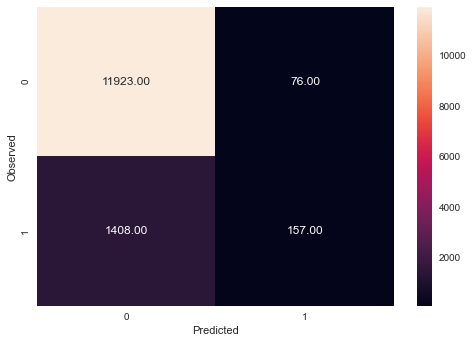

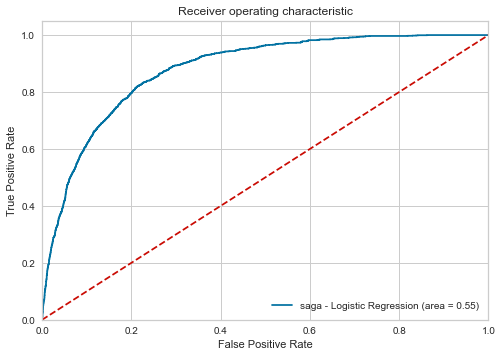

                                           Method  accuracy  precision  \
0  LogisticRegression, solver:liblinear, set:Set1      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set1      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set1      0.89       0.60   
0        LogisticRegression, solver:sag, set:Set1      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set1      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set2      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set2      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set2      0.89       0.56   
0        LogisticRegression, solver:sag, set:Set2      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set2      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set3      0.90       0.66   
0  LogisticRegression, solver:newton-cg, set:Set3      0.90       0.65   
0      LogisticRegression, solver:lbfg

In [693]:
# Logistic Regression: Use different solvers and plot their CM and ROC AUC

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, roc_curve
from sklearn.linear_model import LogisticRegression

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

resultsDf = pd.DataFrame({'Method':[], 'accuracy':0.0, 'precision':0.0, 'recall':0.0, 'f1':0.0, 'roc_auc':0.0 })

def solve(data_set, x_train, y_train, x_test, y_test, rd):
    for solver in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']:# ['liblinear', 'library', 'newton-cg', 'sag', 'saga', 'lbfgs']:
        print(f"******************\nSolver: {solver} for set: {data_set}\n******************")

        model = LogisticRegression(solver=solver, verbose=True, max_iter=100) # class_weight=class_weight) #, l1_ratio=0.5) # class_weight=class_weight ) # 'liblinear' 'library, 'newton-cg', 'sag', 'saga' and 'lbfgs'
        model.fit(x_train, y_train, )
        y_predict = model.predict(x_test)

        coef_df = pd.DataFrame(model.coef_)
        coef_df["intercept"] = model.intercept_
    #    print(f"Coefs:\n {coef_df}")

        model_score_train = model.score(x_train, y_train)
        print("Training accuracy:", model_score_train)

        model_score_test = model.score(x_test, y_test)
        print("Testing accuracy:", model_score_test)

        acc=accuracy_score(y_test, y_predict)
        prec=precision_score(y_test, y_predict)
        rec=recall_score(y_test, y_predict)
        f1=f1_score(y_test, y_predict)
        roc_auc=roc_auc_score(y_test, y_predict)
        print(f"Accuracy: {acc}" )
        print(f"Precision: {prec}" )
        print(f"Recall: {rec}" )
        print(f"F1: {f1}")
        print(f"Roc Auc Score: {roc_auc} " )

        draw_cm(y_test, y_predict)

        logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
        fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
        plt.figure()
        plt.plot(fpr, tpr, label='%s - Logistic Regression (area = %0.2f)' % (solver,logit_roc_auc))
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.savefig('Log_ROC')
        plt.show()

        tempResultsDf = pd.DataFrame({'Method':[f'LogisticRegression, solver:{solver}, set:{data_set}'],
                                      'accuracy': acc,
                                     'precision': prec,
                                     'recall': rec,
                                     'f1': f1,
                                     'roc_auc': roc_auc})
        rd = pd.concat([rd, tempResultsDf])
        rd = rd[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
    return rd

resultsDf = solve("Set1", x_train1, y_train1, x_test1, y_test1, resultsDf)
resultsDf = solve("Set2", x_train2, y_train2, x_test2, y_test2, resultsDf)
resultsDf = solve("Set3", x_train3, y_train3, x_test3, y_test3, resultsDf)
resultsDf = solve("Set4", x_train4, y_train4, x_test4, y_test4, resultsDf)

print(resultsDf)

In [694]:
resultsDf

Method  accuracy  precision  \
0  LogisticRegression, solver:liblinear, set:Set1      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set1      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set1      0.89       0.60   
0        LogisticRegression, solver:sag, set:Set1      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set1      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set2      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set2      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set2      0.89       0.56   
0        LogisticRegression, solver:sag, set:Set2      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set2      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set3      0.90       0.66   
0  LogisticRegression, solver:newton-cg, set:Set3      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set3      0.89       0.58   
0        LogisticRegression, solver:sag, set:Set3      0.85       0.06   
0       LogisticRegression, solver:saga, set:Set3      0.83       0.05   
0  LogisticRegression, solver:liblinear, set:Set4      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set4      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set4      0.90       0.66   
0        LogisticRegression, solver:sag, set:Set4      0.89       0.66   
0       LogisticRegression, solver:saga, set:Set4      0.89       0.67   

   recall   f1  roc_auc  
0    0.36 0.46     0.67  
0    0.36 0.46     0.67  
0    0.22 0.32     0.60  
0    0.00 0.00     0.50  
0    0.00 0.00     0.50  
0    0.31 0.42     0.64  
0    0.31 0.42     0.65  
0    0.21 0.30     0.59  
0    0.00 0.00     0.50  
0    0.00 0.00     0.50  
0    0.33 0.44     0.66  
0    0.36 0.47     0.67  
0    0.24 0.34     0.61  
0    0.02 0.03     0.49  
0    0.03 0.03     0.48  
0    0.36 0.46     0.67  
0    0.36 0.46     0.67  
0    0.36 0.47     0.67  
0    0.16 0.26     0.58  
0    0.10 0.17     0.55

In [ ]:
# Best performance given by:
# 									Method	accuracy	precision	recall	f1	roc_auc
# LogisticRegression, solver:lbfgs, set:Set4	0.90	0.66	0.36	0.47	0.67

# Set 4 uses scaling, robust and standard!


Set:Set1 - gini - depth 5
Train: 0.90
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


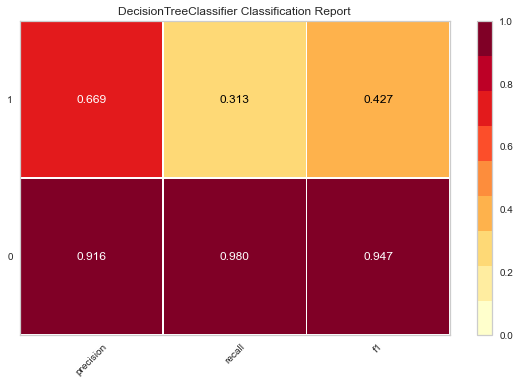

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


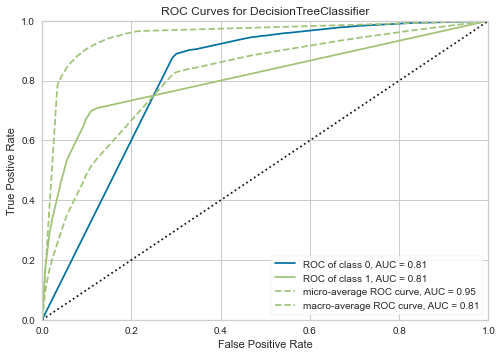

Accuracy: 0.9029047478619876
Precision: 0.6693989071038251
Recall: 0.31309904153354634
F1: 0.42664344797562037
Roc Auc Score: 0.6464653470856331 
Set:Set2 - gini - depth 5
Train: 0.90
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


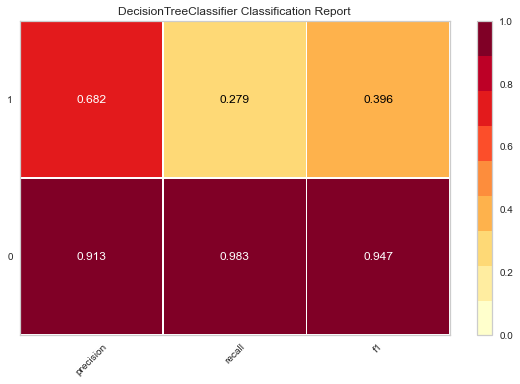

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


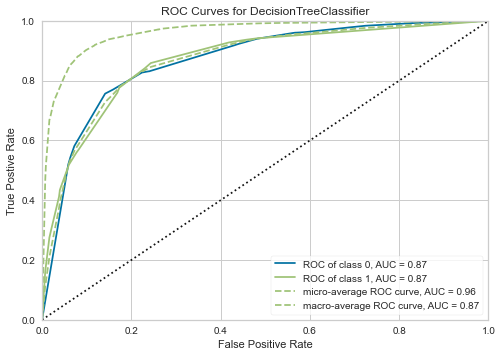

Accuracy: 0.9017988793866116
Precision: 0.6823161189358372
Recall: 0.27859424920127795
F1: 0.3956442831215971
Roc Auc Score: 0.6308380863474512 
Set:Set3 - gini - depth 5
Train: 0.90
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


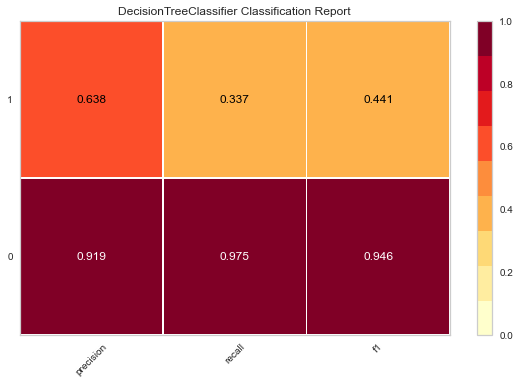

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


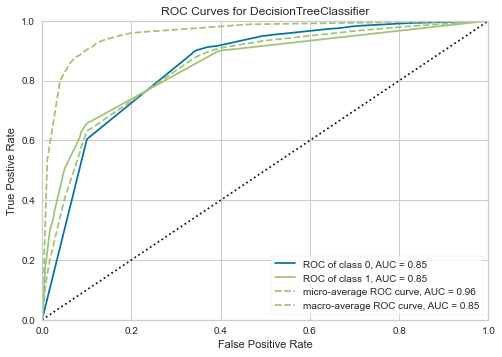

Accuracy: 0.9014302565614863
Precision: 0.6376811594202898
Recall: 0.33738019169329075
F1: 0.4412870873380694
Roc Auc Score: 0.656189054093166 
Set:Set4 - gini - depth 5
Train: 0.90
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


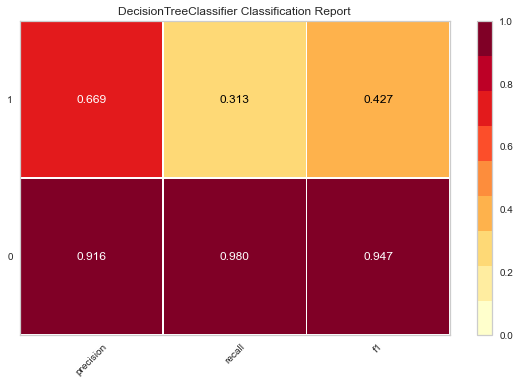

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


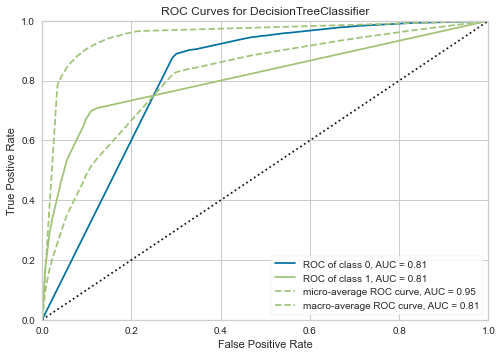

Accuracy: 0.9029047478619876
Precision: 0.6693989071038251
Recall: 0.31309904153354634
F1: 0.42664344797562037
Roc Auc Score: 0.6464653470856331 
                                           Method  accuracy  precision  \
0  LogisticRegression, solver:liblinear, set:Set1      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set1      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set1      0.89       0.60   
0        LogisticRegression, solver:sag, set:Set1      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set1      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set2      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set2      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set2      0.89       0.56   
0        LogisticRegression, solver:sag, set:Set2      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set2      0.88       0.00   
0  LogisticRegression, solver:liblinear,

In [701]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassificationReport, ROCAUC

# Evaluate DecisionTree on all 4 datasets
def eval_tree(data_set, x_train, y_train, x_test, y_test, rd):
    criterion = 'gini' # gini entropy
    depth = 5 # 3 4 5
    dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=depth ) 
    dt_model.fit(x_train, y_train)
 
    print(f"Set:{data_set} - {criterion} - depth {depth}")
    print("Train: %.2f" % dt_model.score(x_train, y_train))  # performance on train data
    print("Test: %.2f" % dt_model.score(x_test, y_test))  # performance on test data
    
    viz = ClassificationReport(dt_model)
    viz.fit(x_train, y_train)
    viz.score(x_test, y_test)
    viz.show()

    roc = ROCAUC(dt_model)
    roc.fit(x_train, y_train)
    roc.score(x_test, y_test)
    roc.show()

    y_predict = dt_model.predict(x_test)
    acc=accuracy_score(y_test, y_predict)
    prec=precision_score(y_test, y_predict)
    rec=recall_score(y_test, y_predict)
    f1=f1_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Accuracy: {acc}" )
    print(f"Precision: {prec}" )
    print(f"Recall: {rec}" )
    print(f"F1: {f1}")
    print(f"Roc Auc Score: {roc_auc} " )
    
    tempResultsDf = pd.DataFrame({'Method':[f'DT set:{data_set}-{criterion}-depth {depth}'],
                                      'accuracy': acc,
                                     'precision': prec,
                                     'recall': rec,
                                     'f1': f1,
                                     'roc_auc': roc_auc})
    rd = pd.concat([rd, tempResultsDf])
    rd = rd[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
    return rd

resultsDf = eval_tree("Set1", x_train1, y_train1, x_test1, y_test1, resultsDf)
resultsDf = eval_tree("Set2", x_train2, y_train2, x_test2, y_test2, resultsDf)
resultsDf = eval_tree("Set3", x_train3, y_train3, x_test3, y_test3, resultsDf)
resultsDf = eval_tree("Set4", x_train4, y_train4, x_test4, y_test4, resultsDf)

print(resultsDf)

In [702]:
resultsDf

Method  accuracy  precision  \
0  LogisticRegression, solver:liblinear, set:Set1      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set1      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set1      0.89       0.60   
0        LogisticRegression, solver:sag, set:Set1      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set1      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set2      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set2      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set2      0.89       0.56   
0        LogisticRegression, solver:sag, set:Set2      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set2      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set3      0.90       0.66   
0  LogisticRegression, solver:newton-cg, set:Set3      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set3      0.89       0.58   
0        LogisticRegression, solver:sag, set:Set3      0.85       0.06   
0       LogisticRegression, solver:saga, set:Set3      0.83       0.05   
0  LogisticRegression, solver:liblinear, set:Set4      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set4      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set4      0.90       0.66   
0        LogisticRegression, solver:sag, set:Set4      0.89       0.66   
0       LogisticRegression, solver:saga, set:Set4      0.89       0.67   
0                           DT set:Set1-entropy-4      0.90       0.58   
0                           DT set:Set1-entropy-4      0.90       0.58   
0                           DT set:Set2-entropy-4      0.90       0.58   
0                           DT set:Set3-entropy-4      0.90       0.58   
0                           DT set:Set4-entropy-4      0.90       0.58   
0                              DT set:Set1-gini-4      0.90       0.59   
0                              DT set:Set2-gini-4      0.90       0.58   
0                              DT set:Set3-gini-4      0.90       0.59   
0                              DT set:Set4-gini-4      0.90       0.59   
0                              DT set:Set1-gini-3      0.90       0.64   
0                              DT set:Set2-gini-3      0.90       0.64   
0                              DT set:Set3-gini-3      0.90       0.64   
0                              DT set:Set4-gini-3      0.90       0.64   
0                              DT set:Set1-gini-5      0.90       0.67   
0                              DT set:Set2-gini-5      0.90       0.68   
0                              DT set:Set3-gini-5      0.90       0.64   
0                              DT set:Set4-gini-5      0.90       0.67   

   recall   f1  roc_auc  
0    0.36 0.46     0.67  
0    0.36 0.46     0.67  
0    0.22 0.32     0.60  
0    0.00 0.00     0.50  
0    0.00 0.00     0.50  
0    0.31 0.42     0.64  
0    0.31 0.42     0.65  
0    0.21 0.30     0.59  
0    0.00 0.00     0.50  
0    0.00 0.00     0.50  
0    0.33 0.44     0.66  
0    0.36 0.47     0.67  
0    0.24 0.34     0.61  
0    0.02 0.03     0.49  
0    0.03 0.03     0.48  
0    0.36 0.46     0.67  
0    0.36 0.46     0.67  
0    0.36 0.47     0.67  
0    0.16 0.26     0.58  
0    0.10 0.17     0.55  
0    0.43 0.50     0.70  
0    0.43 0.50     0.70  
0    0.43 0.50     0.70  
0    0.42 0.49     0.69  
0    0.43 0.50     0.70  
0    0.46 0.51     0.71  
0    0.43 0.50     0.70  
0    0.46 0.51     0.71  
0    0.46 0.51     0.71  
0    0.32 0.42     0.65  
0    0.32 0.42     0.65  
0    0.32 0.42     0.65  
0    0.32 0.42     0.65  
0    0.31 0.43     0.65  
0    0.28 0.40     0.63  
0    0.34 0.44     0.66  
0    0.31 0.43     0.65

In [ ]:
# Best one is 
# 			Method	accuracy	precision	recall	f1	roc_auc
# DT set:Set1-gini-4	0.90	0.59	0.46	0.51	0.71

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set1
Train: 0.90
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


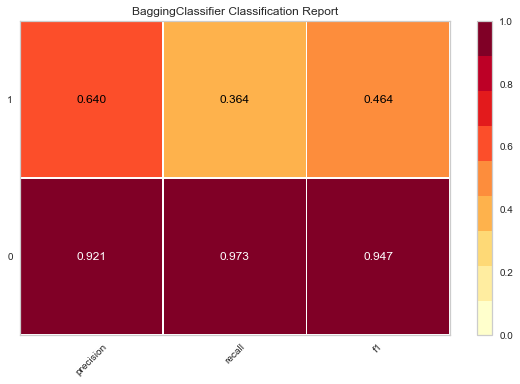

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


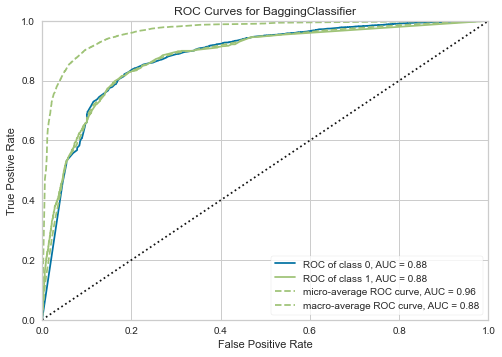

Accuracy: 0.9029784724270127
Precision: 0.6400449943757031
Recall: 0.3635782747603834
F1: 0.4637326813365933
Roc Auc Score: 0.6684546928431468 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set2
Train: 0.90
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


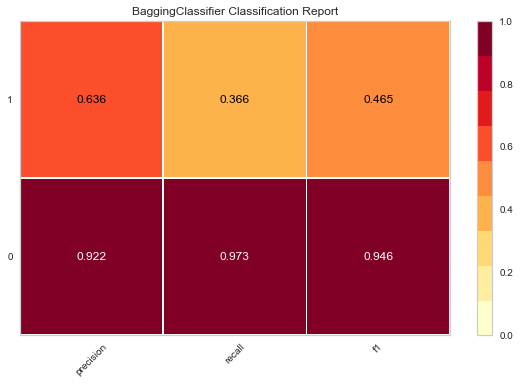

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


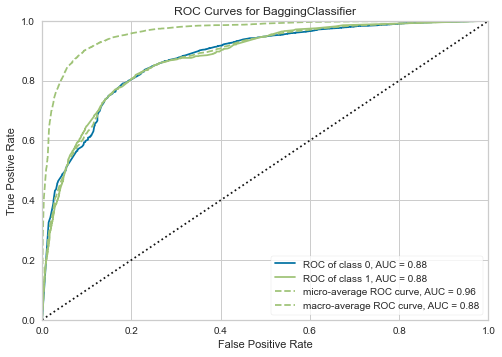

Accuracy: 0.9026835741669124
Precision: 0.6359600443951166
Recall: 0.3661341853035144
F1: 0.464720194647202
Roc Auc Score: 0.6693992870012864 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set3
Train: 0.90
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


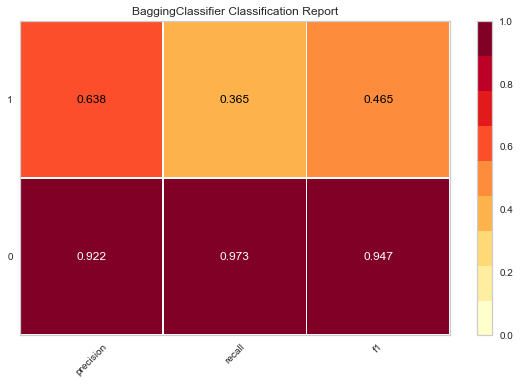

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


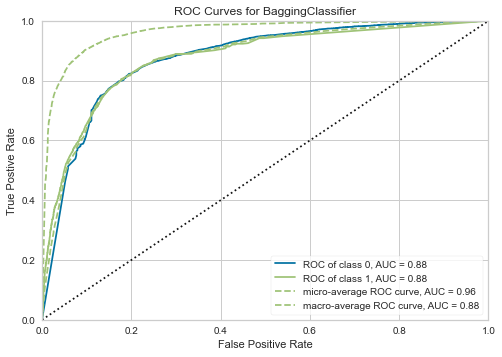

Accuracy: 0.9029047478619876
Precision: 0.6383928571428571
Recall: 0.36549520766773164
F1: 0.46485168630637946
Roc Auc Score: 0.6692464787401079 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set4
Train: 0.90
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


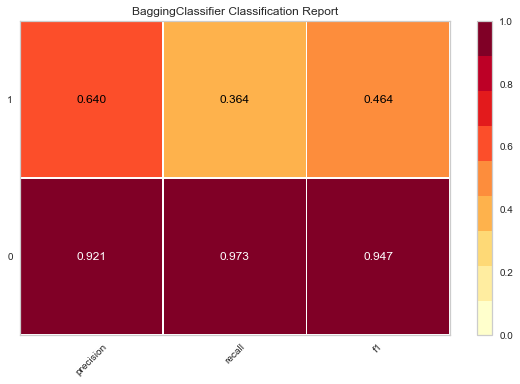

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


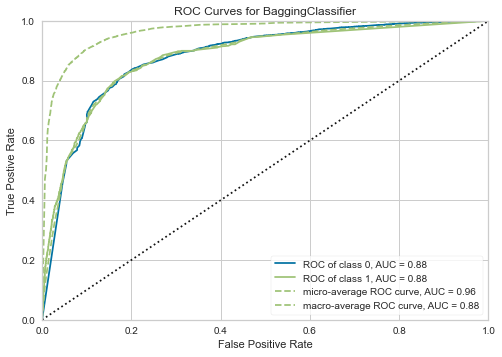

Accuracy: 0.9029784724270127
Precision: 0.6400449943757031
Recall: 0.3635782747603834
F1: 0.4637326813365933
Roc Auc Score: 0.6684546928431468 
                                           Method  accuracy  precision  \
0  LogisticRegression, solver:liblinear, set:Set1      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set1      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set1      0.89       0.60   
0        LogisticRegression, solver:sag, set:Set1      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set1      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set2      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set2      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set2      0.89       0.56   
0        LogisticRegression, solver:sag, set:Set2      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set2      0.88       0.00   
0  LogisticRegression, solver:liblinear, s

In [705]:
# Bagging

from sklearn.ensemble import BaggingClassifier

def eval_bagging(data_set, x_train, y_train, x_test, y_test, rd):
    criterion = 'gini'
    depth = 4
    dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=depth ) 
    bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=2)
#   bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=2)
    bgcl = bgcl.fit(x_train, y_train)

    #dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=depth ) # gini entropy
    bgcl.fit(x_train, y_train)
 
    print(f"Set:{data_set}")
    print("Train: %.2f" % bgcl.score(x_train, y_train))  # performance on train data
    print("Test: %.2f" % bgcl.score(x_test, y_test))  # performance on test data
    
    viz = ClassificationReport(bgcl)
    viz.fit(x_train, y_train)
    viz.score(x_test, y_test)
    viz.show()

    roc = ROCAUC(bgcl)
    roc.fit(x_train, y_train)
    roc.score(x_test, y_test)
    roc.show()

    y_predict = bgcl.predict(x_test)
    acc=accuracy_score(y_test, y_predict)
    prec=precision_score(y_test, y_predict)
    rec=recall_score(y_test, y_predict)
    f1=f1_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Accuracy: {acc}" )
    print(f"Precision: {prec}" )
    print(f"Recall: {rec}" )
    print(f"F1: {f1}")
    print(f"Roc Auc Score: {roc_auc} " )
    
    tempResultsDf = pd.DataFrame({'Method':[f'Bagging-{data_set}-BaseDT:{criterion}-depth {depth}-estimators:50'],
                                      'accuracy': acc,
                                     'precision': prec,
                                     'recall': rec,
                                     'f1': f1,
                                     'roc_auc': roc_auc})
    rd = pd.concat([rd, tempResultsDf])
    rd = rd[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
    return rd

resultsDf = eval_bagging("Set1", x_train1, y_train1, x_test1, y_test1, resultsDf)
resultsDf = eval_bagging("Set2", x_train2, y_train2, x_test2, y_test2, resultsDf)
resultsDf = eval_bagging("Set3", x_train3, y_train3, x_test3, y_test3, resultsDf)
resultsDf = eval_bagging("Set4", x_train4, y_train4, x_test4, y_test4, resultsDf)

print(resultsDf)

In [706]:
resultsDf

Method  accuracy  precision  \
0  LogisticRegression, solver:liblinear, set:Set1      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set1      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set1      0.89       0.60   
0        LogisticRegression, solver:sag, set:Set1      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set1      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set2      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set2      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set2      0.89       0.56   
0        LogisticRegression, solver:sag, set:Set2      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set2      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set3      0.90       0.66   
0  LogisticRegression, solver:newton-cg, set:Set3      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set3      0.89       0.58   
0        LogisticRegression, solver:sag, set:Set3      0.85       0.06   
0       LogisticRegression, solver:saga, set:Set3      0.83       0.05   
0  LogisticRegression, solver:liblinear, set:Set4      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set4      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set4      0.90       0.66   
0        LogisticRegression, solver:sag, set:Set4      0.89       0.66   
0       LogisticRegression, solver:saga, set:Set4      0.89       0.67   
0                           DT set:Set1-entropy-4      0.90       0.58   
0                           DT set:Set1-entropy-4      0.90       0.58   
0                           DT set:Set2-entropy-4      0.90       0.58   
0                           DT set:Set3-entropy-4      0.90       0.58   
0                           DT set:Set4-entropy-4      0.90       0.58   
0                              DT set:Set1-gini-4      0.90       0.59   
0                              DT set:Set2-gini-4      0.90       0.58   
0                              DT set:Set3-gini-4      0.90       0.59   
0                              DT set:Set4-gini-4      0.90       0.59   
0                              DT set:Set1-gini-3      0.90       0.64   
0                              DT set:Set2-gini-3      0.90       0.64   
0                              DT set:Set3-gini-3      0.90       0.64   
0                              DT set:Set4-gini-3      0.90       0.64   
0                              DT set:Set1-gini-5      0.90       0.67   
0                              DT set:Set2-gini-5      0.90       0.68   
0                              DT set:Set3-gini-5      0.90       0.64   
0                              DT set:Set4-gini-5      0.90       0.67   
0                       Bagging:Set1-gini-depth 5      0.90       0.61   
0                       Bagging:Set2-gini-depth 5      0.90       0.61   
0                       Bagging:Set3-gini-depth 5      0.90       0.61   
0                       Bagging:Set4-gini-depth 5      0.91       0.62   
0  Bagging-Set1-BaseDT:gini-depth 4-estimators:50      0.90       0.64   
0  Bagging-Set2-BaseDT:gini-depth 4-estimators:50      0.90       0.64   
0  Bagging-Set3-BaseDT:gini-depth 4-estimators:50      0.90       0.64   
0  Bagging-Set4-BaseDT:gini-depth 4-estimators:50      0.90       0.64   

   recall   f1  roc_auc  
0    0.36 0.46     0.67  
0    0.36 0.46     0.67  
0    0.22 0.32     0.60  
0    0.00 0.00     0.50  
0    0.00 0.00     0.50  
0    0.31 0.42     0.64  
0    0.31 0.42     0.65  
0    0.21 0.30     0.59  
0    0.00 0.00     0.50  
0    0.00 0.00     0.50  
0    0.33 0.44     0.66  
0    0.36 0.47     0.67  
0    0.24 0.34     0.61  
0    0.02 0.03     0.49  
0    0.03 0.03     0.48  
0    0.36 0.46     0.67  
0    0.36 0.46     0.67  
0    0.36 0.47     0.67  
0    0.16 0.26     0.58  
0    0.10 0.17     0.55  
0    0.43 0.50     0.70  
0    0.43 0.50     0.70  
0    0.43 0.50     0.70  
0    0.42 0.49

In [ ]:
# Using base model best DT from previous step didn't improve performance (?)
# Best model so far:
#					Method	accuracy	precision	recall	f1	roc_auc
# Bagging:Set4-gini-depth 5	0.91	0.62	0.47	0.53	0.71


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Set:Set1
Train: 1.00
Test: 0.91


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


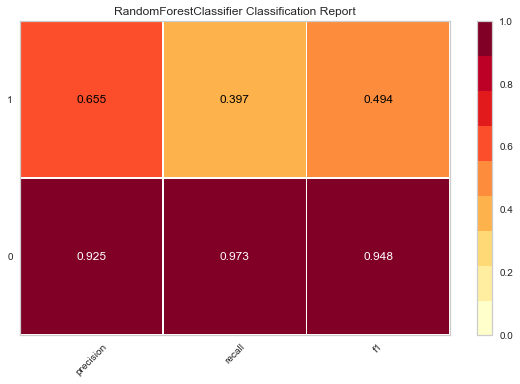

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


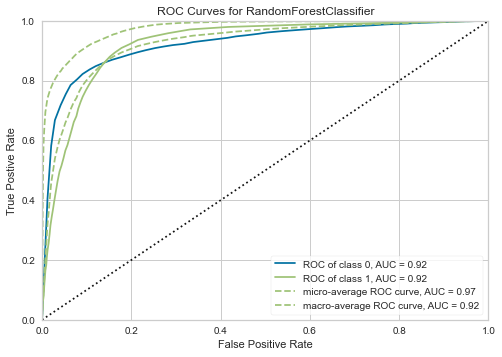

Accuracy: 0.9062960778531407
Precision: 0.6550632911392406
Recall: 0.39680511182108624
F1: 0.4942300039793077
Roc Auc Score: 0.6847764203992505 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Set:Set2
Train: 1.00
Test: 0.91


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


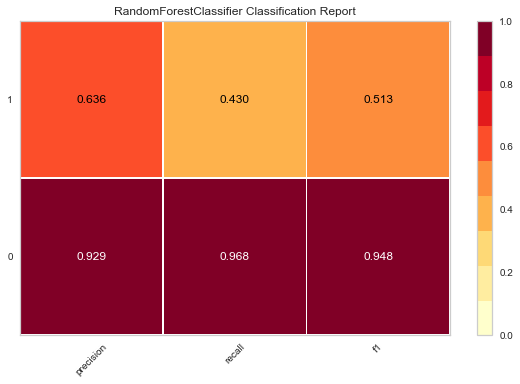

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


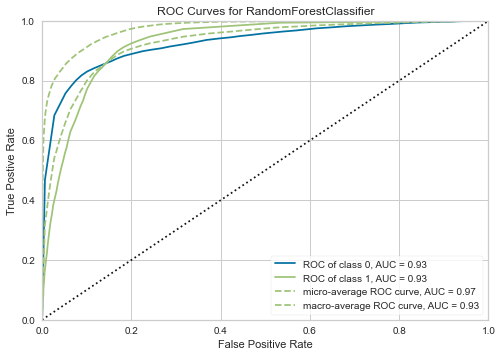

Accuracy: 0.9057800058979653
Precision: 0.6355051935788479
Recall: 0.43003194888178914
F1: 0.5129573170731707
Roc Auc Score: 0.6989313007180843 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Set:Set3
Train: 1.00
Test: 0.91


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


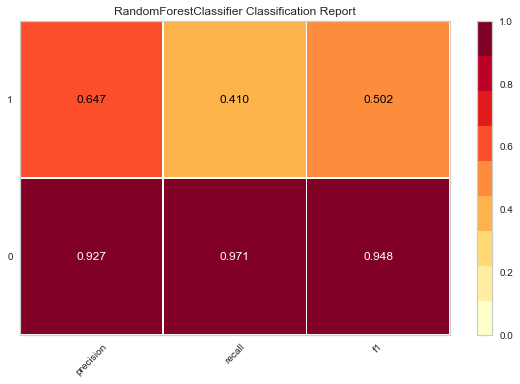

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


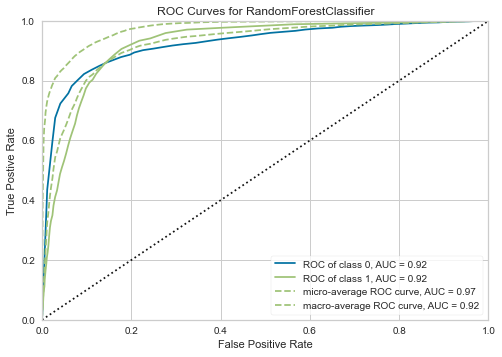

Accuracy: 0.9061486287230905
Precision: 0.6471774193548387
Recall: 0.41022364217252394
F1: 0.5021509581540868
Roc Auc Score: 0.6905272723738692 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Set:Set4
Train: 1.00
Test: 0.91


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


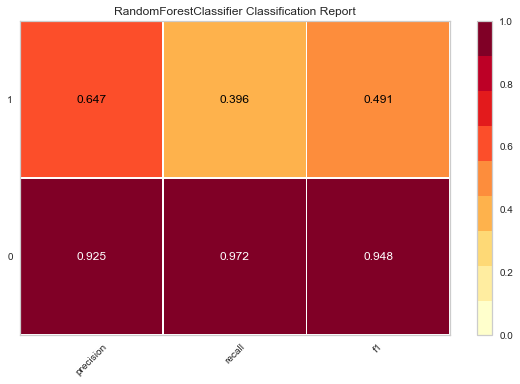

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


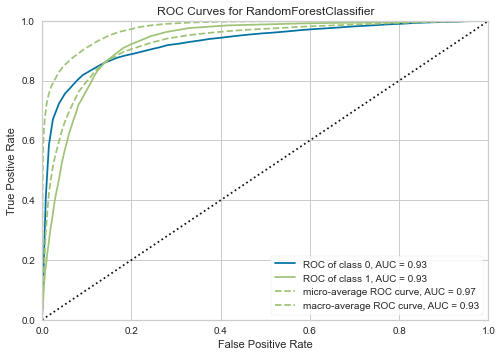

Accuracy: 0.9053376585078148
Precision: 0.6468129571577848
Recall: 0.39552715654952075
F1: 0.4908802537668516
Roc Auc Score: 0.6836790712325069 
                                           Method  accuracy  precision  \
0  LogisticRegression, solver:liblinear, set:Set1      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set1      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set1      0.89       0.60   
0        LogisticRegression, solver:sag, set:Set1      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set1      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set2      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set2      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set2      0.89       0.56   
0        LogisticRegression, solver:sag, set:Set2      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set2      0.88       0.00   
0  LogisticRegression, solver:liblinear, 

In [710]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier

def eval_rf(data_set, x_train, y_train, x_test, y_test, rd):
    rfcl = RandomForestClassifier(n_estimators = 60)
    rfcl = rfcl.fit(x_train, y_train)
    
    print(f"Set:{data_set}")
    print("Train: %.2f" % rfcl.score(x_train, y_train))  # performance on train data
    print("Test: %.2f" % rfcl.score(x_test, y_test))  # performance on test data
    
    viz = ClassificationReport(rfcl)
    viz.fit(x_train, y_train)
    viz.score(x_test, y_test)
    viz.show()

    roc = ROCAUC(rfcl)
    roc.fit(x_train, y_train)
    roc.score(x_test, y_test)
    roc.show()

    y_predict = rfcl.predict(x_test)
    acc=accuracy_score(y_test, y_predict)
    prec=precision_score(y_test, y_predict)
    rec=recall_score(y_test, y_predict)
    f1=f1_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Accuracy: {acc}" )
    print(f"Precision: {prec}" )
    print(f"Recall: {rec}" )
    print(f"F1: {f1}")
    print(f"Roc Auc Score: {roc_auc} " )
    
    tempResultsDf = pd.DataFrame({'Method':[f'RF-{data_set}-estimators:60'],
                                      'accuracy': acc,
                                     'precision': prec,
                                     'recall': rec,
                                     'f1': f1,
                                     'roc_auc': roc_auc})
    rd = pd.concat([rd, tempResultsDf])
    rd = rd[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
    return rd

resultsDf = eval_rf("Set1", x_train1, y_train1, x_test1, y_test1, resultsDf)
resultsDf = eval_rf("Set2", x_train2, y_train2, x_test2, y_test2, resultsDf)
resultsDf = eval_rf("Set3", x_train3, y_train3, x_test3, y_test3, resultsDf)
resultsDf = eval_rf("Set4", x_train4, y_train4, x_test4, y_test4, resultsDf)

print(resultsDf)


In [711]:
resultsDf

Method  accuracy  precision  \
0  LogisticRegression, solver:liblinear, set:Set1      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set1      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set1      0.89       0.60   
0        LogisticRegression, solver:sag, set:Set1      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set1      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set2      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set2      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set2      0.89       0.56   
0        LogisticRegression, solver:sag, set:Set2      0.88       0.00   
0       LogisticRegression, solver:saga, set:Set2      0.88       0.00   
0  LogisticRegression, solver:liblinear, set:Set3      0.90       0.66   
0  LogisticRegression, solver:newton-cg, set:Set3      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set3      0.89       0.58   
0        LogisticRegression, solver:sag, set:Set3      0.85       0.06   
0       LogisticRegression, solver:saga, set:Set3      0.83       0.05   
0  LogisticRegression, solver:liblinear, set:Set4      0.90       0.65   
0  LogisticRegression, solver:newton-cg, set:Set4      0.90       0.65   
0      LogisticRegression, solver:lbfgs, set:Set4      0.90       0.66   
0        LogisticRegression, solver:sag, set:Set4      0.89       0.66   
0       LogisticRegression, solver:saga, set:Set4      0.89       0.67   
0                           DT set:Set1-entropy-4      0.90       0.58   
0                           DT set:Set1-entropy-4      0.90       0.58   
0                           DT set:Set2-entropy-4      0.90       0.58   
0                           DT set:Set3-entropy-4      0.90       0.58   
0                           DT set:Set4-entropy-4      0.90       0.58   
0                              DT set:Set1-gini-4      0.90       0.59   
0                              DT set:Set2-gini-4      0.90       0.58   
0                              DT set:Set3-gini-4      0.90       0.59   
0                              DT set:Set4-gini-4      0.90       0.59   
0                              DT set:Set1-gini-3      0.90       0.64   
0                              DT set:Set2-gini-3      0.90       0.64   
0                              DT set:Set3-gini-3      0.90       0.64   
0                              DT set:Set4-gini-3      0.90       0.64   
0                              DT set:Set1-gini-5      0.90       0.67   
0                              DT set:Set2-gini-5      0.90       0.68   
0                              DT set:Set3-gini-5      0.90       0.64   
0                              DT set:Set4-gini-5      0.90       0.67   
0                       Bagging:Set1-gini-depth 5      0.90       0.61   
0                       Bagging:Set2-gini-depth 5      0.90       0.61   
0                       Bagging:Set3-gini-depth 5      0.90       0.61   
0                       Bagging:Set4-gini-depth 5      0.91       0.62   
0  Bagging-Set1-BaseDT:gini-depth 4-estimators:50      0.90       0.64   
0  Bagging-Set2-BaseDT:gini-depth 4-estimators:50      0.90       0.64   
0  Bagging-Set3-BaseDT:gini-depth 4-estimators:50      0.90       0.64   
0  Bagging-Set4-BaseDT:gini-depth 4-estimators:50      0.90       0.64   
0                           RF-Set1-estimators:50      0.91       0.65   
0                           RF-Set2-estimators:50      0.90       0.63   
0                           RF-Set3-estimators:50      0.90       0.64   
0                           RF-Set4-estimators:50      0.91       0.65   
0                           RF-Set1-estimators:40      0.91       0.65   
0                           RF-Set2-estimators:40      0.91       0.64   
0                           RF-Set3-estimators:40      0.90       0.62   
0                           RF-Set4-estimators:40      0.91       0.65   
0                           RF-Set1-estimators:

In [ ]:
# 3 different RF's give same performance of f1 0.51
# 			Method	accuracy	precision	recall	f1	roc_auc
#RF-Set4-estimators:50	0.91	0.65	0.42	0.51	0.69
#RF-Set2-estimators:40	0.91	0.64	0.43	0.51	0.70
#RF-Set2-estimators:60	0.91	0.64	0.43	0.51	0.70

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set1
Train: 0.89
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


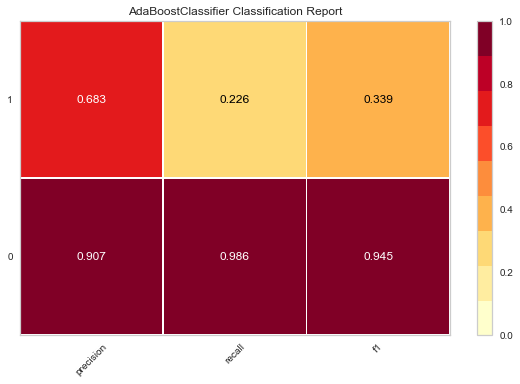

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


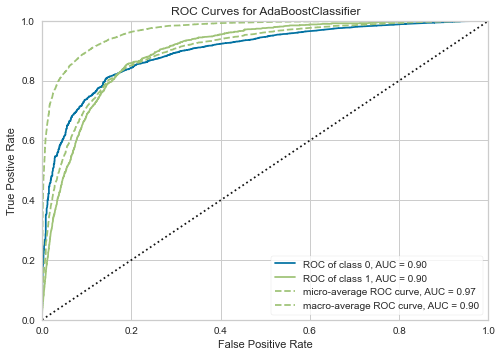

Accuracy: 0.8985549985255087
Precision: 0.6827852998065764
Recall: 0.22555910543130991
F1: 0.3390970220941403
Roc Auc Score: 0.6059456498904195 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set2
Train: 0.89
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


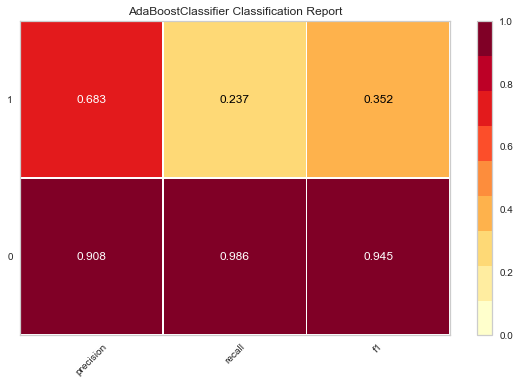

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


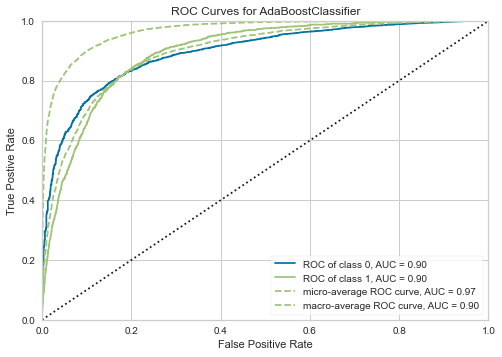

Accuracy: 0.8992922441757594
Precision: 0.6832412523020258
Recall: 0.23706070287539935
F1: 0.3519924098671726
Roc Auc Score: 0.6113630874990381 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set3
Train: 0.90
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


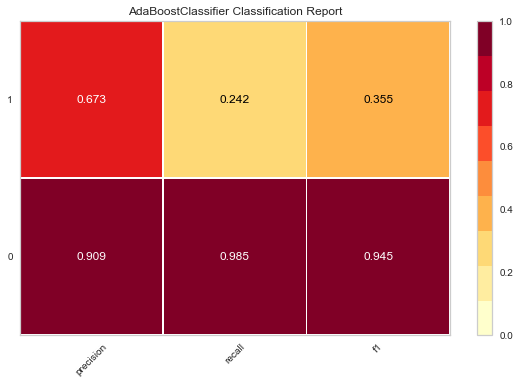

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


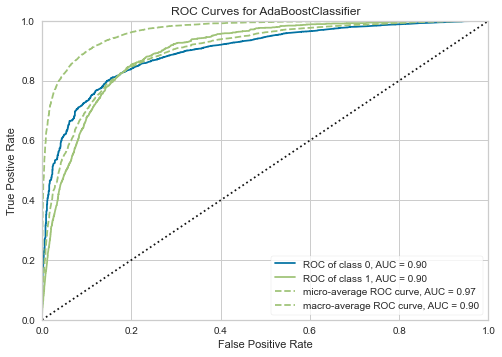

Accuracy: 0.8989236213506341
Precision: 0.6725978647686833
Recall: 0.2415335463258786
F1: 0.3554301833568406
Roc Auc Score: 0.6130994675541386 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set4
Train: 0.89
Test: 0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


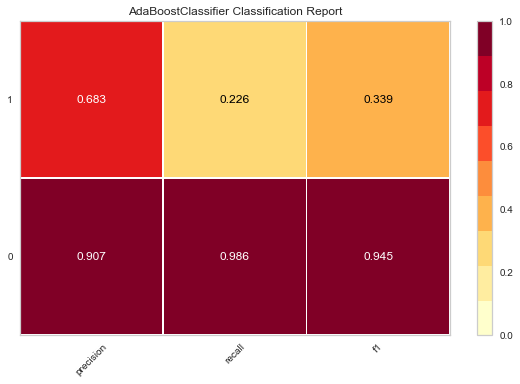

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


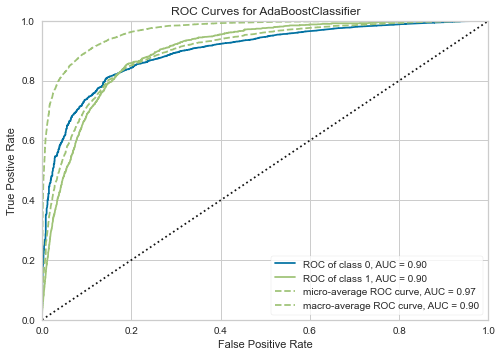

Accuracy: 0.8985549985255087
Precision: 0.6827852998065764
Recall: 0.22555910543130991
F1: 0.3390970220941403
Roc Auc Score: 0.6059456498904195 
                                            Method  accuracy  precision  \
0   LogisticRegression, solver:liblinear, set:Set1      0.90       0.65   
0   LogisticRegression, solver:newton-cg, set:Set1      0.90       0.65   
0       LogisticRegression, solver:lbfgs, set:Set1      0.89       0.60   
0         LogisticRegression, solver:sag, set:Set1      0.88       0.00   
0        LogisticRegression, solver:saga, set:Set1      0.88       0.00   
..                                             ...       ...        ...   
0                     AdaBoost-Set1-estimators:100      0.90       0.68   
0                     AdaBoost-Set1-estimators:100      0.90       0.68   
0                     AdaBoost-Set2-estimators:100      0.90       0.68   
0                     AdaBoost-Set3-estimators:100      0.90       0.67   
0                     AdaBoost

In [714]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

def eval_adab(data_set, x_train, y_train, x_test, y_test, rd):
    abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=2)
    abcl = abcl.fit(x_train, y_train)

    print(f"Set:{data_set}")
    print("Train: %.2f" % abcl.score(x_train, y_train))  # performance on train data
    print("Test: %.2f" % abcl.score(x_test, y_test))  # performance on test data
    
    viz = ClassificationReport(abcl)
    viz.fit(x_train, y_train)
    viz.score(x_test, y_test)
    viz.show()

    roc = ROCAUC(abcl)
    roc.fit(x_train, y_train)
    roc.score(x_test, y_test)
    roc.show()

    y_predict = abcl.predict(x_test)
    acc=accuracy_score(y_test, y_predict)
    prec=precision_score(y_test, y_predict)
    rec=recall_score(y_test, y_predict)
    f1=f1_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Accuracy: {acc}" )
    print(f"Precision: {prec}" )
    print(f"Recall: {rec}" )
    print(f"F1: {f1}")
    print(f"Roc Auc Score: {roc_auc} " )
    
    tempResultsDf = pd.DataFrame({'Method':[f'AdaBoost-{data_set}-estimators:100'],
                                      'accuracy': acc,
                                     'precision': prec,
                                     'recall': rec,
                                     'f1': f1,
                                     'roc_auc': roc_auc})
    rd = pd.concat([rd, tempResultsDf])
    rd = rd[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
    return rd

resultsDf = eval_adab("Set1", x_train1, y_train1, x_test1, y_test1, resultsDf)
resultsDf = eval_adab("Set2", x_train2, y_train2, x_test2, y_test2, resultsDf)
resultsDf = eval_adab("Set3", x_train3, y_train3, x_test3, y_test3, resultsDf)
resultsDf = eval_adab("Set4", x_train4, y_train4, x_test4, y_test4, resultsDf)

print(resultsDf)


In [717]:
resultsDf.tail(15)

Method  accuracy  precision  recall   f1  roc_auc
0         RF-Set3-estimators:50      0.90       0.64    0.39 0.49     0.68
0         RF-Set4-estimators:50      0.91       0.65    0.42 0.51     0.69
0         RF-Set1-estimators:40      0.91       0.65    0.39 0.49     0.68
0         RF-Set2-estimators:40      0.91       0.64    0.43 0.51     0.70
0         RF-Set3-estimators:40      0.90       0.62    0.39 0.48     0.68
0         RF-Set4-estimators:40      0.91       0.65    0.40 0.50     0.69
0         RF-Set1-estimators:60      0.91       0.66    0.40 0.49     0.68
0         RF-Set2-estimators:60      0.91       0.64    0.43 0.51     0.70
0         RF-Set3-estimators:60      0.91       0.65    0.41 0.50     0.69
0         RF-Set4-estimators:60      0.91       0.65    0.40 0.49     0.68
0  AdaBoost-Set1-estimators:100      0.90       0.68    0.23 0.34     0.61
0  AdaBoost-Set1-estimators:100      0.90       0.68    0.23 0.34     0.61
0  AdaBoost-Set2-estimators:100      0.90       0.68    0.24 0.35     0.61
0  AdaBoost-Set3-estimators:100      0.90       0.67    0.24 0.36     0.61
0  AdaBoost-Set4-estimators:100      0.90       0.68    0.23 0.34     0.61

In [ ]:
# AdaBoost best performance:
# 				Method	accuracy	precision	recall	f1	roc_auc
# AdaBoost-Set3-estimators:100	0.90	0.67	0.24	0.36	0.61

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set1
Train: 0.92
Test: 0.91


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


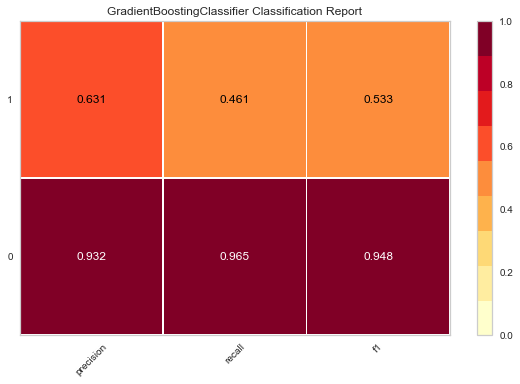

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


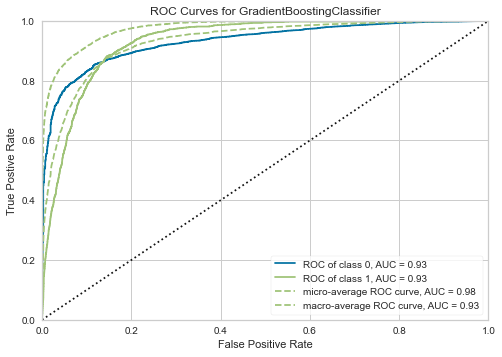

Accuracy: 0.9067384252432911
Precision: 0.6313485113835376
Recall: 0.460702875399361
F1: 0.532693018101219
Roc Auc Score: 0.712808309105631 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set2
Train: 0.92
Test: 0.91


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


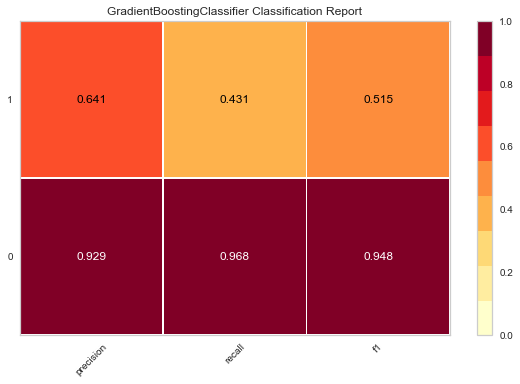

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


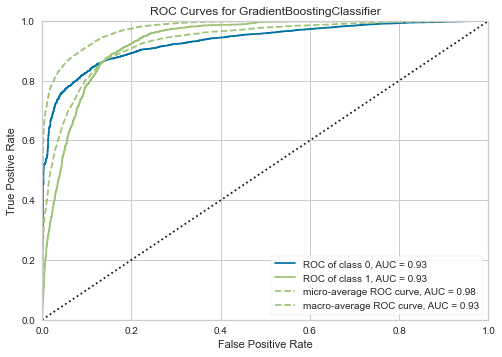

Accuracy: 0.9064435269831908
Precision: 0.6406844106463878
Recall: 0.4306709265175719
F1: 0.5150936186473061
Roc Auc Score: 0.6995841506494018 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set3
Train: 0.92
Test: 0.91


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


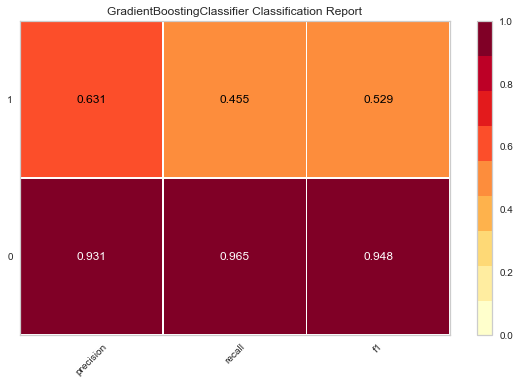

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


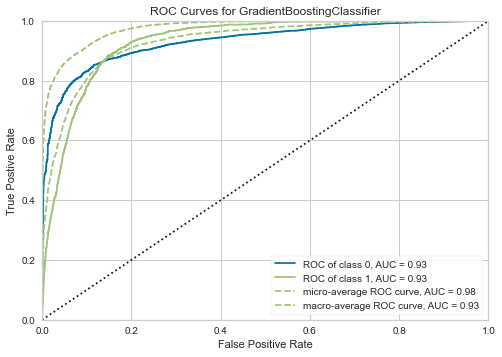

Accuracy: 0.9063698024181658
Precision: 0.6306465899025686
Recall: 0.4549520766773163
F1: 0.5285820341499629
Roc Auc Score: 0.7100995903013217 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set:Set4
Train: 0.92
Test: 0.91


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


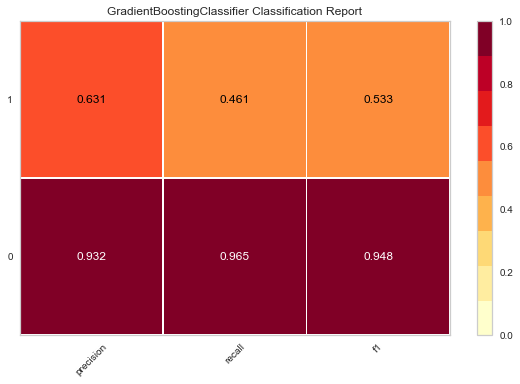

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


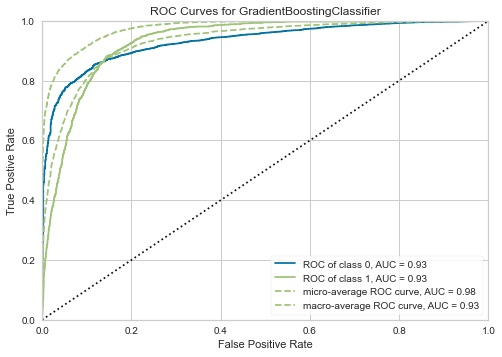

Accuracy: 0.9067384252432911
Precision: 0.6313485113835376
Recall: 0.460702875399361
F1: 0.532693018101219
Roc Auc Score: 0.712808309105631 
                                            Method  accuracy  precision  \
0   LogisticRegression, solver:liblinear, set:Set1      0.90       0.65   
0   LogisticRegression, solver:newton-cg, set:Set1      0.90       0.65   
0       LogisticRegression, solver:lbfgs, set:Set1      0.89       0.60   
0         LogisticRegression, solver:sag, set:Set1      0.88       0.00   
0        LogisticRegression, solver:saga, set:Set1      0.88       0.00   
..                                             ...       ...        ...   
0                GradientBoost-Set4-estimators:100      0.91       0.64   
0                GradientBoost-Set1-estimators:200      0.91       0.63   
0                GradientBoost-Set2-estimators:200      0.91       0.64   
0                GradientBoost-Set3-estimators:200      0.91       0.63   
0                GradientBoost-Set

In [723]:
# GradientBoosting

from sklearn.ensemble import GradientBoostingClassifier

def eval_gb(data_set, x_train, y_train, x_test, y_test, rd):
    gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=2)
    gbcl = gbcl.fit(x_train, y_train)

    print(f"Set:{data_set}")
    print("Train: %.2f" % gbcl.score(x_train, y_train))  # performance on train data
    print("Test: %.2f" % gbcl.score(x_test, y_test))  # performance on test data
    
    viz = ClassificationReport(gbcl)
    viz.fit(x_train, y_train)
    viz.score(x_test, y_test)
    viz.show()

    roc = ROCAUC(gbcl)
    roc.fit(x_train, y_train)
    roc.score(x_test, y_test)
    roc.show()

    y_predict = gbcl.predict(x_test)
    acc=accuracy_score(y_test, y_predict)
    prec=precision_score(y_test, y_predict)
    rec=recall_score(y_test, y_predict)
    f1=f1_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Accuracy: {acc}" )
    print(f"Precision: {prec}" )
    print(f"Recall: {rec}" )
    print(f"F1: {f1}")
    print(f"Roc Auc Score: {roc_auc} " )
    
    tempResultsDf = pd.DataFrame({'Method':[f'GradientBoost-{data_set}-estimators:200'],
                                      'accuracy': acc,
                                     'precision': prec,
                                     'recall': rec,
                                     'f1': f1,
                                     'roc_auc': roc_auc})
    rd = pd.concat([rd, tempResultsDf])
    rd = rd[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
    return rd

resultsDf = eval_gb("Set1", x_train1, y_train1, x_test1, y_test1, resultsDf)
resultsDf = eval_gb("Set2", x_train2, y_train2, x_test2, y_test2, resultsDf)
resultsDf = eval_gb("Set3", x_train3, y_train3, x_test3, y_test3, resultsDf)
resultsDf = eval_gb("Set4", x_train4, y_train4, x_test4, y_test4, resultsDf)

print(resultsDf)

In [724]:
resultsDf.tail(10)

Method  accuracy  precision  recall   f1  \
0   GradientBoost-Set3-estimators:10      0.90       0.78    0.14 0.23   
0   GradientBoost-Set4-estimators:10      0.90       0.79    0.13 0.22   
0  GradientBoost-Set1-estimators:100      0.91       0.64    0.43 0.51   
0  GradientBoost-Set2-estimators:100      0.91       0.64    0.41 0.50   
0  GradientBoost-Set3-estimators:100      0.91       0.64    0.42 0.51   
0  GradientBoost-Set4-estimators:100      0.91       0.64    0.43 0.51   
0  GradientBoost-Set1-estimators:200      0.91       0.63    0.46 0.53   
0  GradientBoost-Set2-estimators:200      0.91       0.64    0.43 0.52   
0  GradientBoost-Set3-estimators:200      0.91       0.63    0.45 0.53   
0  GradientBoost-Set4-estimators:200      0.91       0.63    0.46 0.53   

   roc_auc  
0     0.57  
0     0.56  
0     0.70  
0     0.69  
0     0.70  
0     0.70  
0     0.71  
0     0.70  
0     0.71  
0     0.71

In [732]:
# Results sorted by F1

resultsDf2 = resultsDf.copy() # just in case...

resultsDf2.sort_values(by="f1").tail(10)

Method  accuracy  precision  recall   f1  \
0                 DT set:Set4-gini-4      0.90       0.59    0.46 0.51   
0                 DT set:Set1-gini-4      0.90       0.59    0.46 0.51   
0  GradientBoost-Set2-estimators:200      0.91       0.64    0.43 0.52   
0          Bagging:Set2-gini-depth 5      0.90       0.61    0.46 0.52   
0          Bagging:Set1-gini-depth 5      0.90       0.61    0.46 0.52   
0          Bagging:Set3-gini-depth 5      0.90       0.61    0.46 0.53   
0  GradientBoost-Set3-estimators:200      0.91       0.63    0.45 0.53   
0  GradientBoost-Set1-estimators:200      0.91       0.63    0.46 0.53   
0  GradientBoost-Set4-estimators:200      0.91       0.63    0.46 0.53   
0          Bagging:Set4-gini-depth 5      0.91       0.62    0.47 0.53   

   roc_auc  
0     0.71  
0     0.71  
0     0.70  
0     0.71  
0     0.71  
0     0.71  
0     0.71  
0     0.71  
0     0.71  
0     0.71

# Conclusion

### Best peformance
Best pefromance is given by a Bagging and GradientBoost with an f1 of 0.53,
with precision varying from 0.61 to 0.63, recall from 0.45 to 0.47 and accuracy from 0.90 to 0.91.

Choosing the best one would depend on what's more important for the business, either targeting clients that would not get a Term Deposit, or not targeting clients that would get a Term Deposit.

Best scores are on data sets 1, 3 and 4 - all of which have "dummies" created. Non-dummies (set 2) seem to hurt performance.

Data sets 3 and 4 have scalers applied, which seem to have helped, especially LogisticRegression.

Scaling should not impact Decision Trees, that's why Set 1 is also part of the best solution.

My guess is that f1 could be increased by exploring more parameters (estimators, learning rate, depth, etc).
